In [1]:
import pandas as pd
import numpy as np

In [2]:
labels = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'attack_type', 'difficulty_level']# subclass - > attack_type
train = pd.read_csv('KDDTrain+.csv', header= None, names=labels)
test = pd.read_csv('KDDTest+.csv', header = None, names =labels)
train20= pd.read_csv('20 Percent Training Set.csv', header = None, names = labels )

print('Training set:',train.shape)
print('Test set:',test.shape)
print('train 20% set : ', train20.shape)


Training set: (125973, 43)
Test set: (22543, 43)
train 20% set :  (25192, 43)


In [3]:
train.head(10)


duration protocol_type     service flag  src_bytes  dst_bytes  land  \
0         0           tcp    ftp_data   SF        491          0     0   
1         0           udp       other   SF        146          0     0   
2         0           tcp     private   S0          0          0     0   
3         0           tcp        http   SF        232       8153     0   
4         0           tcp        http   SF        199        420     0   
5         0           tcp     private  REJ          0          0     0   
6         0           tcp     private   S0          0          0     0   
7         0           tcp     private   S0          0          0     0   
8         0           tcp  remote_job   S0          0          0     0   
9         0           tcp     private   S0          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   
5               0       0    0  ...                    0.07   
6               0       0    0  ...                    0.04   
7               0       0    0  ...                    0.06   
8               0       0    0  ...                    0.09   
9               0       0    0  ...                    0.05   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   
5                    0.07                         0.00   
6                    0.05                         0.00   
7                    0.07                         0.00   
8                    0.05                         0.00   
9                    0.06                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   
5                         0.00                  0.00   
6                         0.00                  1.00   
7                         0.00                  1.00   
8                         0.00                  1.00   
9                         0.00                  1.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   
5                      0.00                  1.00                      1.00   
6                      1.00                  0.00                      0.00   
7                      1.00                  0.00                      0.00   
8                      1.00                  0.00                      0.00   
9                      1.00                  0.00                      0.00   

   attack_type  difficulty_level  
0       normal                20  
1       normal                15  
2      neptune                19  
3       normal                21  
4       normal                21  
5      neptune                21  
6      neptune                21  
7      neptune                21  
8      neptune                21  
9      neptune    

In [4]:
test.head(10)


duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   
5         0           tcp      http    SF        267      14515     0   
6         0           tcp      smtp    SF       1022        387     0   
7         0           tcp    telnet    SF        129        174     0   
8         0           tcp      http    SF        327        467     0   
9         0           tcp       ftp    SF         26        157     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.04   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.61   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.31   
5               0       0    0  ...                    1.00   
6               0       0    0  ...                    0.11   
7               0       0    0  ...                    1.00   
8               0       0    0  ...                    1.00   
9               0       0    0  ...                    0.50   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.06                         0.00   
1                    0.06                         0.00   
2                    0.04                         0.61   
3                    0.00                         1.00   
4                    0.17                         0.03   
5                    0.00                         0.01   
6                    0.72                         0.00   
7                    0.00                         0.00   
8                    0.00                         0.01   
9                    0.08                         0.02   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.02                  0.00   
3                         0.28                  0.00   
4                         0.02                  0.00   
5                         0.03                  0.01   
6                         0.00                  0.00   
7                         0.00                  0.01   
8                         0.03                  0.00   
9                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  1.00                      1.00   
1                      0.00                  1.00                      1.00   
2                      0.00                  0.00                      0.00   
3                      0.00                  0.00                      0.00   
4                      0.00                  0.83                      0.71   
5                      0.00                  0.00                      0.00   
6                      0.00                  0.72                      0.04   
7                      0.01                  0.02                      0.02   
8                      0.00                  0.00                      0.00   
9                      0.00                  0.00                      0.00   

    attack_type  difficulty_level  
0       neptune                21  
1       neptune                21  
2        normal                21  
3         saint                15  
4         mscan                11  
5        normal                21  
6        normal                21  
7  guess_passwd                15  
8        normal                21  
9  guess_passwd    

In [5]:
train20.head(10)

duration protocol_type     service flag  src_bytes  dst_bytes  land  \
0         0           tcp    ftp_data   SF        491          0     0   
1         0           udp       other   SF        146          0     0   
2         0           tcp     private   S0          0          0     0   
3         0           tcp        http   SF        232       8153     0   
4         0           tcp        http   SF        199        420     0   
5         0           tcp     private  REJ          0          0     0   
6         0           tcp     private   S0          0          0     0   
7         0           tcp     private   S0          0          0     0   
8         0           tcp  remote_job   S0          0          0     0   
9         0           tcp     private   S0          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   
5               0       0    0  ...                    0.07   
6               0       0    0  ...                    0.04   
7               0       0    0  ...                    0.06   
8               0       0    0  ...                    0.09   
9               0       0    0  ...                    0.05   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   
5                    0.07                         0.00   
6                    0.05                         0.00   
7                    0.07                         0.00   
8                    0.05                         0.00   
9                    0.06                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   
5                         0.00                  0.00   
6                         0.00                  1.00   
7                         0.00                  1.00   
8                         0.00                  1.00   
9                         0.00                  1.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   
5                      0.00                  1.00                      1.00   
6                      1.00                  0.00                      0.00   
7                      1.00                  0.00                      0.00   
8                      1.00                  0.00                      0.00   
9                      1.00                  0.00                      0.00   

   attack_type  difficulty_level  
0       normal                20  
1       normal                15  
2      neptune                19  
3       normal                21  
4       normal                21  
5      neptune                21  
6      neptune                21  
7      neptune                21  
8      neptune                21  
9      neptune    

In [6]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [7]:
test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
train20.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [9]:
train.describe()

duration     src_bytes     dst_bytes           land  \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.000198   
std      2604.51531  5.870331e+06  4.021269e+06       0.014086   
min         0.00000  0.000000e+00  0.000000e+00       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125973.000000  125973.000000  125973.000000      125973.000000   
mean         0.022687       0.000111       0.204409           0.001222   
std          0.253530       0.014366       2.149968           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.000000       0.000000           0.000000   
50%          0.000000       0.000000       0.000000           0.000000   
75%          0.000000       0.000000       0.000000           0.000000   
max          3.000000       3.000000      77.000000           5.000000   

           logged_in  num_compromised  ...  dst_host_srv_count  \
count  125973.000000    125973.000000  ...       125973.000000   
mean        0.395736         0.279250  ...          115.653005   
std         0.489010        23.942042  ...          110.702741   
min         0.000000         0.000000  ...            0.000000   
25%         0.000000         0.000000  ...           10.000000   
50%         0.000000         0.000000  ...           63.000000   
75%         1.000000         0.000000  ...          255.000000   
max         1.000000      7479.000000  ...          255.000000   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count           125973.000000           125973.000000   
mean                 0.521242                0.082951   
std                  0.448949                0.188922   
min                  0.000000                0.000000   
25%                  0.050000                0.000000   
50%                  0.510000                0.020000   
75%                  1.000000                0.070000   
max                  1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                125973.000000                125973.000000   
mean                      0.148379                     0.032542   
std                       0.308997                     0.112564   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.060000                     0.020000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count         125973.000000             125973.000000         125973.000000   
mean               0.284452                  0.278485              0.118832   
std                0.444784                  0.445669              0.306557   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                1.000000                  1.000000              0.000000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate  difficulty_level  
count             125973.000000     125973.000000  
mean                   0.120240         19.504060  
std                    0.319459          2.291503  
min                    0.000000          0.000000  
25%                    0.000000         18.000000  
50%         

In [10]:
train20.describe()

duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  25192.000000  2.519200e+04  2.519200e+04  25192.000000    25192.000000   
mean     305.054104  2.433063e+04  3.491847e+03      0.000079        0.023738   
std     2686.555640  2.410805e+06  8.883072e+04      0.008910        0.260221   
min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
50%        0.000000  4.400000e+01  0.000000e+00      0.000000        0.000000   
75%        0.000000  2.790000e+02  5.302500e+02      0.000000        0.000000   
max    42862.000000  3.817091e+08  5.151385e+06      1.000000        3.000000   

            urgent           hot  num_failed_logins     logged_in  \
count  25192.00000  25192.000000       25192.000000  25192.000000   
mean       0.00004      0.198039           0.001191      0.394768   
std        0.00630      2.154202           0.045418      0.488811   
min        0.00000      0.000000           0.000000      0.000000   
25%        0.00000      0.000000           0.000000      0.000000   
50%        0.00000      0.000000           0.000000      0.000000   
75%        0.00000      0.000000           0.000000      1.000000   
max        1.00000     77.000000           4.000000      1.000000   

       num_compromised  ...  dst_host_srv_count  dst_host_same_srv_rate  \
count     25192.000000  ...        25192.000000            25192.000000   
mean          0.227850  ...          115.063036                0.519791   
std          10.417352  ...          110.646850                0.448944   
min           0.000000  ...            0.000000                0.000000   
25%           0.000000  ...           10.000000                0.050000   
50%           0.000000  ...           61.000000                0.510000   
75%           0.000000  ...          255.000000                1.000000   
max         884.000000  ...          255.000000                1.000000   

       dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
count            25192.000000                 25192.000000   
mean                 0.082539                     0.147453   
std                  0.187191                     0.308367   
min                  0.000000                     0.000000   
25%                  0.000000                     0.000000   
50%                  0.030000                     0.000000   
75%                  0.070000                     0.060000   
max                  1.000000                     1.000000   

       dst_host_srv_diff_host_rate  dst_host_serror_rate  \
count                 25192.000000          25192.000000   
mean                      0.031844              0.285800   
std                       0.110575              0.445316   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.000000              0.000000   
75%                       0.020000              1.000000   
max                       1.000000              1.000000   

       dst_host_srv_serror_rate  dst_host_rerror_rate  \
count              25192.000000          25192.000000   
mean                   0.279846              0.117800   
std                    0.446075              0.305869   
min                    0.000000              0.000000   
25%                    0.000000              0.000000   
50%                    0.000000              0.000000   
75%                    1.000000              0.000000   
max                    1.000000              1.000000   

       dst_host_srv_rerror_rate  difficulty_level  
count              25192.000000      25192.000000  
mean                   0.118769         19.487695  
std                    0.317333          2.328541  
min                    0.000000          0.000000  
25%                    0.000000         18.000000  
50%                    0.000000         20.000000  
75%  

In [11]:
train["protocol_type"].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [12]:
train["service"].unique()


array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [13]:

train["flag"].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [14]:
protocol_type_label = pd.get_dummies(train.protocol_type)
protocol_type_label_test = pd.get_dummies(test.protocol_type)
protocol_type_label
protocol_type_label_test

icmp  tcp  udp
0         0    1    0
1         0    1    0
2         0    1    0
3         1    0    0
4         0    1    0
...     ...  ...  ...
22538     0    1    0
22539     0    1    0
22540     0    1    0
22541     0    0    1
22542     0    1    0

[22543 rows x 3 columns]

In [15]:
protocol_type_label =protocol_type_label.drop(["udp"],axis = 1)

In [16]:
protocol_type_label

icmp  tcp
0          0    1
1          0    0
2          0    1
3          0    1
4          0    1
...      ...  ...
125968     0    1
125969     0    0
125970     0    1
125971     0    1
125972     0    1

[125973 rows x 2 columns]

In [17]:
train = train.drop(['protocol_type'], axis =1)
train.head()

duration   service flag  src_bytes  dst_bytes  land  wrong_fragment  \
0         0  ftp_data   SF        491          0     0               0   
1         0     other   SF        146          0     0               0   
2         0   private   S0          0          0     0               0   
3         0      http   SF        232       8153     0               0   
4         0      http   SF        199        420     0               0   

   urgent  hot  num_failed_logins  ...  dst_host_same_srv_rate  \
0       0    0                  0  ...                    0.17   
1       0    0                  0  ...                    0.00   
2       0    0                  0  ...                    0.10   
3       0    0                  0  ...                    1.00   
4       0    0                  0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   

   attack_type  difficulty_level  
0       normal                20  
1       normal                15  
2      neptune                19  
3       normal                21  
4       normal                21  

[5 rows x 42 columns]

In [18]:
train = pd.concat([train,protocol_type_label],axis = 'columns')
train.head()

duration   service flag  src_bytes  dst_bytes  land  wrong_fragment  \
0         0  ftp_data   SF        491          0     0               0   
1         0     other   SF        146          0     0               0   
2         0   private   S0          0          0     0               0   
3         0      http   SF        232       8153     0               0   
4         0      http   SF        199        420     0               0   

   urgent  hot  num_failed_logins  ...  dst_host_same_src_port_rate  \
0       0    0                  0  ...                         0.17   
1       0    0                  0  ...                         0.88   
2       0    0                  0  ...                         0.00   
3       0    0                  0  ...                         0.03   
4       0    0                  0  ...                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   

   attack_type  difficulty_level  icmp  tcp  
0       normal                20     0    1  
1       normal                15     0    0  
2      neptune                19     0    1  
3       normal                21     0    1  
4       normal                21     0    1  

[5 rows x 44 columns]

In [19]:
service_label=pd.get_dummies(train.service)
service_label

IRC  X11  Z39_50  aol  auth  bgp  courier  csnet_ns  ctf  daytime  \
0         0    0       0    0     0    0        0         0    0        0   
1         0    0       0    0     0    0        0         0    0        0   
2         0    0       0    0     0    0        0         0    0        0   
3         0    0       0    0     0    0        0         0    0        0   
4         0    0       0    0     0    0        0         0    0        0   
...     ...  ...     ...  ...   ...  ...      ...       ...  ...      ...   
125968    0    0       0    0     0    0        0         0    0        0   
125969    0    0       0    0     0    0        0         0    0        0   
125970    0    0       0    0     0    0        0         0    0        0   
125971    0    0       0    0     0    0        0         0    0        0   
125972    0    0       0    0     0    0        0         0    0        0   

        ...  telnet  tftp_u  tim_i  time  urh_i  urp_i  uucp  uucp_path  \
0       ...       0       0      0     0      0      0     0          0   
1       ...       0       0      0     0      0      0     0          0   
2       ...       0       0      0     0      0      0     0          0   
3       ...       0       0      0     0      0      0     0          0   
4       ...       0       0      0     0      0      0     0          0   
...     ...     ...     ...    ...   ...    ...    ...   ...        ...   
125968  ...       0       0      0     0      0      0     0          0   
125969  ...       0       0      0     0      0      0     0          0   
125970  ...       0       0      0     0      0      0     0          0   
125971  ...       0       0      0     0      0      0     0          0   
125972  ...       0       0      0     0      0      0     0          0   

        vmnet  whois  
0           0      0  
1           0      0  
2           0      0  
3           0      0  
4           0      0  
...       ...    ...  
125968      0      0  
125969      0      0  
125970      0      0  
125971      0      0  
125972      0      0  

[125973 rows x 70 columns]

In [20]:
service_label =service_label.drop(["whois"],axis = 1)


In [21]:
service_label

IRC  X11  Z39_50  aol  auth  bgp  courier  csnet_ns  ctf  daytime  \
0         0    0       0    0     0    0        0         0    0        0   
1         0    0       0    0     0    0        0         0    0        0   
2         0    0       0    0     0    0        0         0    0        0   
3         0    0       0    0     0    0        0         0    0        0   
4         0    0       0    0     0    0        0         0    0        0   
...     ...  ...     ...  ...   ...  ...      ...       ...  ...      ...   
125968    0    0       0    0     0    0        0         0    0        0   
125969    0    0       0    0     0    0        0         0    0        0   
125970    0    0       0    0     0    0        0         0    0        0   
125971    0    0       0    0     0    0        0         0    0        0   
125972    0    0       0    0     0    0        0         0    0        0   

        ...  systat  telnet  tftp_u  tim_i  time  urh_i  urp_i  uucp  \
0       ...       0       0       0      0     0      0      0     0   
1       ...       0       0       0      0     0      0      0     0   
2       ...       0       0       0      0     0      0      0     0   
3       ...       0       0       0      0     0      0      0     0   
4       ...       0       0       0      0     0      0      0     0   
...     ...     ...     ...     ...    ...   ...    ...    ...   ...   
125968  ...       0       0       0      0     0      0      0     0   
125969  ...       0       0       0      0     0      0      0     0   
125970  ...       0       0       0      0     0      0      0     0   
125971  ...       0       0       0      0     0      0      0     0   
125972  ...       0       0       0      0     0      0      0     0   

        uucp_path  vmnet  
0               0      0  
1               0      0  
2               0      0  
3               0      0  
4               0      0  
...           ...    ...  
125968          0      0  
125969          0      0  
125970          0      0  
125971          0      0  
125972          0      0  

[125973 rows x 69 columns]

In [22]:
train = train.drop(['service'], axis =1)
train.head()

duration flag  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0   SF        491          0     0               0       0    0   
1         0   SF        146          0     0               0       0    0   
2         0   S0          0          0     0               0       0    0   
3         0   SF        232       8153     0               0       0    0   
4         0   SF        199        420     0               0       0    0   

   num_failed_logins  logged_in  ...  dst_host_same_src_port_rate  \
0                  0          0  ...                         0.17   
1                  0          0  ...                         0.88   
2                  0          0  ...                         0.00   
3                  0          1  ...                         0.03   
4                  0          1  ...                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   

   attack_type  difficulty_level  icmp  tcp  
0       normal                20     0    1  
1       normal                15     0    0  
2      neptune                19     0    1  
3       normal                21     0    1  
4       normal                21     0    1  

[5 rows x 43 columns]

In [23]:
train = pd.concat([train,service_label],axis = 'columns')
train.head()

duration flag  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0   SF        491          0     0               0       0    0   
1         0   SF        146          0     0               0       0    0   
2         0   S0          0          0     0               0       0    0   
3         0   SF        232       8153     0               0       0    0   
4         0   SF        199        420     0               0       0    0   

   num_failed_logins  logged_in  ...  systat  telnet  tftp_u  tim_i  time  \
0                  0          0  ...       0       0       0      0     0   
1                  0          0  ...       0       0       0      0     0   
2                  0          0  ...       0       0       0      0     0   
3                  0          1  ...       0       0       0      0     0   
4                  0          1  ...       0       0       0      0     0   

   urh_i  urp_i  uucp  uucp_path  vmnet  
0      0      0     0          0      0  
1      0      0     0          0      0  
2      0      0     0          0      0  
3      0      0     0          0      0  
4      0      0     0          0      0  

[5 rows x 112 columns]

In [24]:
flag_label= pd.get_dummies(train.flag)
flag_label

OTH  REJ  RSTO  RSTOS0  RSTR  S0  S1  S2  S3  SF  SH
0         0    0     0       0     0   0   0   0   0   1   0
1         0    0     0       0     0   0   0   0   0   1   0
2         0    0     0       0     0   1   0   0   0   0   0
3         0    0     0       0     0   0   0   0   0   1   0
4         0    0     0       0     0   0   0   0   0   1   0
...     ...  ...   ...     ...   ...  ..  ..  ..  ..  ..  ..
125968    0    0     0       0     0   1   0   0   0   0   0
125969    0    0     0       0     0   0   0   0   0   1   0
125970    0    0     0       0     0   0   0   0   0   1   0
125971    0    0     0       0     0   1   0   0   0   0   0
125972    0    0     0       0     0   0   0   0   0   1   0

[125973 rows x 11 columns]

In [25]:
flag_label =flag_label.drop(["SF"],axis = 1)

In [26]:
flag_label

OTH  REJ  RSTO  RSTOS0  RSTR  S0  S1  S2  S3  SH
0         0    0     0       0     0   0   0   0   0   0
1         0    0     0       0     0   0   0   0   0   0
2         0    0     0       0     0   1   0   0   0   0
3         0    0     0       0     0   0   0   0   0   0
4         0    0     0       0     0   0   0   0   0   0
...     ...  ...   ...     ...   ...  ..  ..  ..  ..  ..
125968    0    0     0       0     0   1   0   0   0   0
125969    0    0     0       0     0   0   0   0   0   0
125970    0    0     0       0     0   0   0   0   0   0
125971    0    0     0       0     0   1   0   0   0   0
125972    0    0     0       0     0   0   0   0   0   0

[125973 rows x 10 columns]

In [27]:
train = train.drop(['flag'], axis =1)
train.head(10)

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        491          0     0               0       0    0   
1         0        146          0     0               0       0    0   
2         0          0          0     0               0       0    0   
3         0        232       8153     0               0       0    0   
4         0        199        420     0               0       0    0   
5         0          0          0     0               0       0    0   
6         0          0          0     0               0       0    0   
7         0          0          0     0               0       0    0   
8         0          0          0     0               0       0    0   
9         0          0          0     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  ...  systat  telnet  tftp_u  \
0                  0          0                0  ...       0       0       0   
1                  0          0                0  ...       0       0       0   
2                  0          0                0  ...       0       0       0   
3                  0          1                0  ...       0       0       0   
4                  0          1                0  ...       0       0       0   
5                  0          0                0  ...       0       0       0   
6                  0          0                0  ...       0       0       0   
7                  0          0                0  ...       0       0       0   
8                  0          0                0  ...       0       0       0   
9                  0          0                0  ...       0       0       0   

   tim_i  time  urh_i  urp_i  uucp  uucp_path  vmnet  
0      0     0      0      0     0          0      0  
1      0     0      0      0     0          0      0  
2      0     0      0      0     0          0      0  
3      0     0      0      0     0          0      0  
4      0     0      0      0     0          0      0  
5      0     0      0      0     0          0      0  
6      0     0      0      0     0          0      0  
7      0     0      0      0     0          0      0  
8      0     0      0      0     0          0      0  
9      0     0      0      0     0          0      0  

[10 rows x 111 columns]

In [28]:
train = pd.concat([train,flag_label],axis = 'columns')
train.head(10)

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        491          0     0               0       0    0   
1         0        146          0     0               0       0    0   
2         0          0          0     0               0       0    0   
3         0        232       8153     0               0       0    0   
4         0        199        420     0               0       0    0   
5         0          0          0     0               0       0    0   
6         0          0          0     0               0       0    0   
7         0          0          0     0               0       0    0   
8         0          0          0     0               0       0    0   
9         0          0          0     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  ...  OTH  REJ  RSTO  RSTOS0  \
0                  0          0                0  ...    0    0     0       0   
1                  0          0                0  ...    0    0     0       0   
2                  0          0                0  ...    0    0     0       0   
3                  0          1                0  ...    0    0     0       0   
4                  0          1                0  ...    0    0     0       0   
5                  0          0                0  ...    0    1     0       0   
6                  0          0                0  ...    0    0     0       0   
7                  0          0                0  ...    0    0     0       0   
8                  0          0                0  ...    0    0     0       0   
9                  0          0                0  ...    0    0     0       0   

   RSTR  S0  S1  S2  S3  SH  
0     0   0   0   0   0   0  
1     0   0   0   0   0   0  
2     0   1   0   0   0   0  
3     0   0   0   0   0   0  
4     0   0   0   0   0   0  
5     0   0   0   0   0   0  
6     0   1   0   0   0   0  
7     0   1   0   0   0   0  
8     0   1   0   0   0   0  
9     0   1   0   0   0   0  

[10 rows x 121 columns]

In [29]:
test["protocol_type"].unique()

array(['tcp', 'icmp', 'udp'], dtype=object)

In [30]:
test["service"].unique()

array(['private', 'ftp_data', 'eco_i', 'telnet', 'http', 'smtp', 'ftp',
       'ldap', 'pop_3', 'courier', 'discard', 'ecr_i', 'imap4',
       'domain_u', 'mtp', 'systat', 'iso_tsap', 'other', 'csnet_ns',
       'finger', 'uucp', 'whois', 'netbios_ns', 'link', 'Z39_50',
       'sunrpc', 'auth', 'netbios_dgm', 'uucp_path', 'vmnet', 'domain',
       'name', 'pop_2', 'http_443', 'urp_i', 'login', 'gopher', 'exec',
       'time', 'remote_job', 'ssh', 'kshell', 'sql_net', 'shell',
       'hostnames', 'echo', 'daytime', 'pm_dump', 'IRC', 'netstat', 'ctf',
       'nntp', 'netbios_ssn', 'tim_i', 'supdup', 'bgp', 'nnsp', 'rje',
       'printer', 'efs', 'X11', 'ntp_u', 'klogin'], dtype=object)

In [31]:
test["flag"].unique()

array(['REJ', 'SF', 'RSTO', 'S0', 'RSTR', 'SH', 'S3', 'S2', 'S1',
       'RSTOS0', 'OTH'], dtype=object)

In [32]:
protocol_type_label=pd.get_dummies(test.protocol_type)
protocol_type_label

icmp  tcp  udp
0         0    1    0
1         0    1    0
2         0    1    0
3         1    0    0
4         0    1    0
...     ...  ...  ...
22538     0    1    0
22539     0    1    0
22540     0    1    0
22541     0    0    1
22542     0    1    0

[22543 rows x 3 columns]

In [33]:
protocol_type_label =protocol_type_label.drop(["udp"],axis = 1)

In [34]:
protocol_type_label

icmp  tcp
0         0    1
1         0    1
2         0    1
3         1    0
4         0    1
...     ...  ...
22538     0    1
22539     0    1
22540     0    1
22541     0    0
22542     0    1

[22543 rows x 2 columns]

In [35]:
test = test.drop(['protocol_type'], axis =1)
test.head()

duration   service  flag  src_bytes  dst_bytes  land  wrong_fragment  \
0         0   private   REJ          0          0     0               0   
1         0   private   REJ          0          0     0               0   
2         2  ftp_data    SF      12983          0     0               0   
3         0     eco_i    SF         20          0     0               0   
4         1    telnet  RSTO          0         15     0               0   

   urgent  hot  num_failed_logins  ...  dst_host_same_srv_rate  \
0       0    0                  0  ...                    0.04   
1       0    0                  0  ...                    0.00   
2       0    0                  0  ...                    0.61   
3       0    0                  0  ...                    1.00   
4       0    0                  0  ...                    0.31   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.06                         0.00   
1                    0.06                         0.00   
2                    0.04                         0.61   
3                    0.00                         1.00   
4                    0.17                         0.03   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                   0.0   
1                         0.00                   0.0   
2                         0.02                   0.0   
3                         0.28                   0.0   
4                         0.02                   0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                  1.00                      1.00   
1                       0.0                  1.00                      1.00   
2                       0.0                  0.00                      0.00   
3                       0.0                  0.00                      0.00   
4                       0.0                  0.83                      0.71   

   attack_type  difficulty_level  
0      neptune                21  
1      neptune                21  
2       normal                21  
3        saint                15  
4        mscan                11  

[5 rows x 42 columns]

In [36]:
test = pd.concat([test,protocol_type_label],axis = 'columns')
test.head(10)

duration   service  flag  src_bytes  dst_bytes  land  wrong_fragment  \
0         0   private   REJ          0          0     0               0   
1         0   private   REJ          0          0     0               0   
2         2  ftp_data    SF      12983          0     0               0   
3         0     eco_i    SF         20          0     0               0   
4         1    telnet  RSTO          0         15     0               0   
5         0      http    SF        267      14515     0               0   
6         0      smtp    SF       1022        387     0               0   
7         0    telnet    SF        129        174     0               0   
8         0      http    SF        327        467     0               0   
9         0       ftp    SF         26        157     0               0   

   urgent  hot  num_failed_logins  ...  dst_host_same_src_port_rate  \
0       0    0                  0  ...                         0.00   
1       0    0                  0  ...                         0.00   
2       0    0                  0  ...                         0.61   
3       0    0                  0  ...                         1.00   
4       0    0                  0  ...                         0.03   
5       0    0                  0  ...                         0.01   
6       0    0                  0  ...                         0.00   
7       0    0                  1  ...                         0.00   
8       0    0                  0  ...                         0.01   
9       0    0                  1  ...                         0.02   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.02                  0.00   
3                         0.28                  0.00   
4                         0.02                  0.00   
5                         0.03                  0.01   
6                         0.00                  0.00   
7                         0.00                  0.01   
8                         0.03                  0.00   
9                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  1.00                      1.00   
1                      0.00                  1.00                      1.00   
2                      0.00                  0.00                      0.00   
3                      0.00                  0.00                      0.00   
4                      0.00                  0.83                      0.71   
5                      0.00                  0.00                      0.00   
6                      0.00                  0.72                      0.04   
7                      0.01                  0.02                      0.02   
8                      0.00                  0.00                      0.00   
9                      0.00                  0.00                      0.00   

    attack_type  difficulty_level  icmp  tcp  
0       neptune                21     0    1  
1       neptune                21     0    1  
2        normal                21     0    1  
3         saint                15     1    0  
4         mscan                11     0    1  
5        normal                21     0    1  
6        normal                21     0    1  
7  guess_passwd                15     0    1  
8        normal                21     0    1  
9  guess_passwd                 7     0    1  

[10 rows x 44 columns]

In [37]:
service_label=pd.get_dummies(test.service)
service_label

IRC  X11  Z39_50  auth  bgp  courier  csnet_ns  ctf  daytime  discard  \
0        0    0       0     0    0        0         0    0        0        0   
1        0    0       0     0    0        0         0    0        0        0   
2        0    0       0     0    0        0         0    0        0        0   
3        0    0       0     0    0        0         0    0        0        0   
4        0    0       0     0    0        0         0    0        0        0   
...    ...  ...     ...   ...  ...      ...       ...  ...      ...      ...   
22538    0    0       0     0    0        0         0    0        0        0   
22539    0    0       0     0    0        0         0    0        0        0   
22540    0    0       0     0    0        0         0    0        0        0   
22541    0    0       0     0    0        0         0    0        0        0   
22542    0    0       0     0    0        0         0    0        0        0   

       ...  supdup  systat  telnet  tim_i  time  urp_i  uucp  uucp_path  \
0      ...       0       0       0      0     0      0     0          0   
1      ...       0       0       0      0     0      0     0          0   
2      ...       0       0       0      0     0      0     0          0   
3      ...       0       0       0      0     0      0     0          0   
4      ...       0       0       1      0     0      0     0          0   
...    ...     ...     ...     ...    ...   ...    ...   ...        ...   
22538  ...       0       0       0      0     0      0     0          0   
22539  ...       0       0       0      0     0      0     0          0   
22540  ...       0       0       0      0     0      0     0          0   
22541  ...       0       0       0      0     0      0     0          0   
22542  ...       0       0       0      0     0      0     0          0   

       vmnet  whois  
0          0      0  
1          0      0  
2          0      0  
3          0      0  
4          0      0  
...      ...    ...  
22538      0      0  
22539      0      0  
22540      0      0  
22541      0      0  
22542      0      0  

[22543 rows x 63 columns]

In [38]:
service_label = service_label.drop(["X11"],axis = 1)

In [39]:
service_label

IRC  Z39_50  auth  bgp  courier  csnet_ns  ctf  daytime  discard  \
0        0       0     0    0        0         0    0        0        0   
1        0       0     0    0        0         0    0        0        0   
2        0       0     0    0        0         0    0        0        0   
3        0       0     0    0        0         0    0        0        0   
4        0       0     0    0        0         0    0        0        0   
...    ...     ...   ...  ...      ...       ...  ...      ...      ...   
22538    0       0     0    0        0         0    0        0        0   
22539    0       0     0    0        0         0    0        0        0   
22540    0       0     0    0        0         0    0        0        0   
22541    0       0     0    0        0         0    0        0        0   
22542    0       0     0    0        0         0    0        0        0   

       domain  ...  supdup  systat  telnet  tim_i  time  urp_i  uucp  \
0           0  ...       0       0       0      0     0      0     0   
1           0  ...       0       0       0      0     0      0     0   
2           0  ...       0       0       0      0     0      0     0   
3           0  ...       0       0       0      0     0      0     0   
4           0  ...       0       0       1      0     0      0     0   
...       ...  ...     ...     ...     ...    ...   ...    ...   ...   
22538       0  ...       0       0       0      0     0      0     0   
22539       0  ...       0       0       0      0     0      0     0   
22540       0  ...       0       0       0      0     0      0     0   
22541       0  ...       0       0       0      0     0      0     0   
22542       0  ...       0       0       0      0     0      0     0   

       uucp_path  vmnet  whois  
0              0      0      0  
1              0      0      0  
2              0      0      0  
3              0      0      0  
4              0      0      0  
...          ...    ...    ...  
22538          0      0      0  
22539          0      0      0  
22540          0      0      0  
22541          0      0      0  
22542          0      0      0  

[22543 rows x 62 columns]

In [40]:
test = test.drop(['service'], axis =1)
test.head()

duration  flag  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0   REJ          0          0     0               0       0    0   
1         0   REJ          0          0     0               0       0    0   
2         2    SF      12983          0     0               0       0    0   
3         0    SF         20          0     0               0       0    0   
4         1  RSTO          0         15     0               0       0    0   

   num_failed_logins  logged_in  ...  dst_host_same_src_port_rate  \
0                  0          0  ...                         0.00   
1                  0          0  ...                         0.00   
2                  0          0  ...                         0.61   
3                  0          0  ...                         1.00   
4                  0          0  ...                         0.03   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                   0.0   
1                         0.00                   0.0   
2                         0.02                   0.0   
3                         0.28                   0.0   
4                         0.02                   0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                  1.00                      1.00   
1                       0.0                  1.00                      1.00   
2                       0.0                  0.00                      0.00   
3                       0.0                  0.00                      0.00   
4                       0.0                  0.83                      0.71   

   attack_type  difficulty_level  icmp  tcp  
0      neptune                21     0    1  
1      neptune                21     0    1  
2       normal                21     0    1  
3        saint                15     1    0  
4        mscan                11     0    1  

[5 rows x 43 columns]

In [41]:
test = pd.concat([test,service_label],axis = 'columns')
test.head(10)

duration  flag  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0   REJ          0          0     0               0       0    0   
1         0   REJ          0          0     0               0       0    0   
2         2    SF      12983          0     0               0       0    0   
3         0    SF         20          0     0               0       0    0   
4         1  RSTO          0         15     0               0       0    0   
5         0    SF        267      14515     0               0       0    0   
6         0    SF       1022        387     0               0       0    0   
7         0    SF        129        174     0               0       0    0   
8         0    SF        327        467     0               0       0    0   
9         0    SF         26        157     0               0       0    0   

   num_failed_logins  logged_in  ...  supdup  systat  telnet  tim_i  time  \
0                  0          0  ...       0       0       0      0     0   
1                  0          0  ...       0       0       0      0     0   
2                  0          0  ...       0       0       0      0     0   
3                  0          0  ...       0       0       0      0     0   
4                  0          0  ...       0       0       1      0     0   
5                  0          1  ...       0       0       0      0     0   
6                  0          1  ...       0       0       0      0     0   
7                  1          0  ...       0       0       1      0     0   
8                  0          1  ...       0       0       0      0     0   
9                  1          0  ...       0       0       0      0     0   

   urp_i  uucp  uucp_path  vmnet  whois  
0      0     0          0      0      0  
1      0     0          0      0      0  
2      0     0          0      0      0  
3      0     0          0      0      0  
4      0     0          0      0      0  
5      0     0          0      0      0  
6      0     0          0      0      0  
7      0     0          0      0      0  
8      0     0          0      0      0  
9      0     0          0      0      0  

[10 rows x 105 columns]

In [42]:
flag_label=pd.get_dummies(test.flag)
flag_label

OTH  REJ  RSTO  RSTOS0  RSTR  S0  S1  S2  S3  SF  SH
0        0    1     0       0     0   0   0   0   0   0   0
1        0    1     0       0     0   0   0   0   0   0   0
2        0    0     0       0     0   0   0   0   0   1   0
3        0    0     0       0     0   0   0   0   0   1   0
4        0    0     1       0     0   0   0   0   0   0   0
...    ...  ...   ...     ...   ...  ..  ..  ..  ..  ..  ..
22538    0    0     0       0     0   0   0   0   0   1   0
22539    0    0     0       0     0   0   0   0   0   1   0
22540    0    0     0       0     0   0   0   0   0   1   0
22541    0    0     0       0     0   0   0   0   0   1   0
22542    0    1     0       0     0   0   0   0   0   0   0

[22543 rows x 11 columns]

In [43]:
flag_label = flag_label.drop(["SF"],axis = 1)

In [44]:
flag_label

OTH  REJ  RSTO  RSTOS0  RSTR  S0  S1  S2  S3  SH
0        0    1     0       0     0   0   0   0   0   0
1        0    1     0       0     0   0   0   0   0   0
2        0    0     0       0     0   0   0   0   0   0
3        0    0     0       0     0   0   0   0   0   0
4        0    0     1       0     0   0   0   0   0   0
...    ...  ...   ...     ...   ...  ..  ..  ..  ..  ..
22538    0    0     0       0     0   0   0   0   0   0
22539    0    0     0       0     0   0   0   0   0   0
22540    0    0     0       0     0   0   0   0   0   0
22541    0    0     0       0     0   0   0   0   0   0
22542    0    1     0       0     0   0   0   0   0   0

[22543 rows x 10 columns]

In [45]:
test = test.drop(['flag'], axis =1)
test.head()

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0          0          0     0               0       0    0   
1         0          0          0     0               0       0    0   
2         2      12983          0     0               0       0    0   
3         0         20          0     0               0       0    0   
4         1          0         15     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  ...  supdup  systat  telnet  \
0                  0          0                0  ...       0       0       0   
1                  0          0                0  ...       0       0       0   
2                  0          0                0  ...       0       0       0   
3                  0          0                0  ...       0       0       0   
4                  0          0                0  ...       0       0       1   

   tim_i  time  urp_i  uucp  uucp_path  vmnet  whois  
0      0     0      0     0          0      0      0  
1      0     0      0     0          0      0      0  
2      0     0      0     0          0      0      0  
3      0     0      0     0          0      0      0  
4      0     0      0     0          0      0      0  

[5 rows x 104 columns]

In [46]:
test = pd.concat([test,flag_label],axis = 'columns')
test.head(10)

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0          0          0     0               0       0    0   
1         0          0          0     0               0       0    0   
2         2      12983          0     0               0       0    0   
3         0         20          0     0               0       0    0   
4         1          0         15     0               0       0    0   
5         0        267      14515     0               0       0    0   
6         0       1022        387     0               0       0    0   
7         0        129        174     0               0       0    0   
8         0        327        467     0               0       0    0   
9         0         26        157     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  ...  OTH  REJ  RSTO  RSTOS0  \
0                  0          0                0  ...    0    1     0       0   
1                  0          0                0  ...    0    1     0       0   
2                  0          0                0  ...    0    0     0       0   
3                  0          0                0  ...    0    0     0       0   
4                  0          0                0  ...    0    0     1       0   
5                  0          1                0  ...    0    0     0       0   
6                  0          1                0  ...    0    0     0       0   
7                  1          0                0  ...    0    0     0       0   
8                  0          1                0  ...    0    0     0       0   
9                  1          0                0  ...    0    0     0       0   

   RSTR  S0  S1  S2  S3  SH  
0     0   0   0   0   0   0  
1     0   0   0   0   0   0  
2     0   0   0   0   0   0  
3     0   0   0   0   0   0  
4     0   0   0   0   0   0  
5     0   0   0   0   0   0  
6     0   0   0   0   0   0  
7     0   0   0   0   0   0  
8     0   0   0   0   0   0  
9     0   0   0   0   0   0  

[10 rows x 114 columns]

In [47]:
train20["protocol_type"].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [48]:
train20["service"].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001'], dtype=object)

In [49]:
train20["flag"].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [50]:
protocol_type_label=pd.get_dummies(train20.protocol_type)
protocol_type_label

icmp  tcp  udp
0         0    1    0
1         0    0    1
2         0    1    0
3         0    1    0
4         0    1    0
...     ...  ...  ...
25187     0    1    0
25188     0    1    0
25189     0    1    0
25190     0    1    0
25191     0    1    0

[25192 rows x 3 columns]

In [51]:
protocol_type_label = protocol_type_label.drop(["udp"],axis = 1)


In [52]:
protocol_type_label

icmp  tcp
0         0    1
1         0    0
2         0    1
3         0    1
4         0    1
...     ...  ...
25187     0    1
25188     0    1
25189     0    1
25190     0    1
25191     0    1

[25192 rows x 2 columns]

In [53]:
train20 = train20.drop(['protocol_type'], axis =1)
train20.head()

duration   service flag  src_bytes  dst_bytes  land  wrong_fragment  \
0         0  ftp_data   SF        491          0     0               0   
1         0     other   SF        146          0     0               0   
2         0   private   S0          0          0     0               0   
3         0      http   SF        232       8153     0               0   
4         0      http   SF        199        420     0               0   

   urgent  hot  num_failed_logins  ...  dst_host_same_srv_rate  \
0       0    0                  0  ...                    0.17   
1       0    0                  0  ...                    0.00   
2       0    0                  0  ...                    0.10   
3       0    0                  0  ...                    1.00   
4       0    0                  0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   

   attack_type  difficulty_level  
0       normal                20  
1       normal                15  
2      neptune                19  
3       normal                21  
4       normal                21  

[5 rows x 42 columns]

In [54]:
train20 = pd.concat([train20,protocol_type_label],axis = 'columns')
train20.head(10)

duration     service flag  src_bytes  dst_bytes  land  wrong_fragment  \
0         0    ftp_data   SF        491          0     0               0   
1         0       other   SF        146          0     0               0   
2         0     private   S0          0          0     0               0   
3         0        http   SF        232       8153     0               0   
4         0        http   SF        199        420     0               0   
5         0     private  REJ          0          0     0               0   
6         0     private   S0          0          0     0               0   
7         0     private   S0          0          0     0               0   
8         0  remote_job   S0          0          0     0               0   
9         0     private   S0          0          0     0               0   

   urgent  hot  num_failed_logins  ...  dst_host_same_src_port_rate  \
0       0    0                  0  ...                         0.17   
1       0    0                  0  ...                         0.88   
2       0    0                  0  ...                         0.00   
3       0    0                  0  ...                         0.03   
4       0    0                  0  ...                         0.00   
5       0    0                  0  ...                         0.00   
6       0    0                  0  ...                         0.00   
7       0    0                  0  ...                         0.00   
8       0    0                  0  ...                         0.00   
9       0    0                  0  ...                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   
5                         0.00                  0.00   
6                         0.00                  1.00   
7                         0.00                  1.00   
8                         0.00                  1.00   
9                         0.00                  1.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   
5                      0.00                  1.00                      1.00   
6                      1.00                  0.00                      0.00   
7                      1.00                  0.00                      0.00   
8                      1.00                  0.00                      0.00   
9                      1.00                  0.00                      0.00   

   attack_type  difficulty_level  icmp  tcp  
0       normal                20     0    1  
1       normal                15     0    0  
2      neptune                19     0    1  
3       normal                21     0    1  
4       normal                21     0    1  
5      neptune                21     0    1  
6      neptune                21     0    1  
7      neptune                21     0    1  
8      neptune                21     0    1  
9      neptune                21     0    1  

[10 rows x 44 columns]

In [55]:
service_label=pd.get_dummies(train20.service)
service_label

IRC  X11  Z39_50  auth  bgp  courier  csnet_ns  ctf  daytime  discard  \
0        0    0       0     0    0        0         0    0        0        0   
1        0    0       0     0    0        0         0    0        0        0   
2        0    0       0     0    0        0         0    0        0        0   
3        0    0       0     0    0        0         0    0        0        0   
4        0    0       0     0    0        0         0    0        0        0   
...    ...  ...     ...   ...  ...      ...       ...  ...      ...      ...   
25187    0    0       0     0    0        0         0    0        0        0   
25188    0    0       0     0    0        0         0    0        0        0   
25189    0    0       0     0    0        0         0    0        0        0   
25190    0    0       0     0    0        0         0    0        0        0   
25191    0    0       0     0    0        0         0    0        0        0   

       ...  systat  telnet  tim_i  time  urh_i  urp_i  uucp  uucp_path  vmnet  \
0      ...       0       0      0     0      0      0     0          0      0   
1      ...       0       0      0     0      0      0     0          0      0   
2      ...       0       0      0     0      0      0     0          0      0   
3      ...       0       0      0     0      0      0     0          0      0   
4      ...       0       0      0     0      0      0     0          0      0   
...    ...     ...     ...    ...   ...    ...    ...   ...        ...    ...   
25187  ...       0       0      0     0      0      0     0          0      0   
25188  ...       0       0      0     0      0      0     0          0      0   
25189  ...       0       0      0     0      0      0     0          0      0   
25190  ...       0       0      0     0      0      0     0          0      0   
25191  ...       0       0      0     0      0      0     0          0      0   

       whois  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
25187      0  
25188      0  
25189      0  
25190      0  
25191      0  

[25192 rows x 66 columns]

In [56]:
service_label = service_label.drop(["whois"],axis = 1)

In [57]:
service_label

IRC  X11  Z39_50  auth  bgp  courier  csnet_ns  ctf  daytime  discard  \
0        0    0       0     0    0        0         0    0        0        0   
1        0    0       0     0    0        0         0    0        0        0   
2        0    0       0     0    0        0         0    0        0        0   
3        0    0       0     0    0        0         0    0        0        0   
4        0    0       0     0    0        0         0    0        0        0   
...    ...  ...     ...   ...  ...      ...       ...  ...      ...      ...   
25187    0    0       0     0    0        0         0    0        0        0   
25188    0    0       0     0    0        0         0    0        0        0   
25189    0    0       0     0    0        0         0    0        0        0   
25190    0    0       0     0    0        0         0    0        0        0   
25191    0    0       0     0    0        0         0    0        0        0   

       ...  supdup  systat  telnet  tim_i  time  urh_i  urp_i  uucp  \
0      ...       0       0       0      0     0      0      0     0   
1      ...       0       0       0      0     0      0      0     0   
2      ...       0       0       0      0     0      0      0     0   
3      ...       0       0       0      0     0      0      0     0   
4      ...       0       0       0      0     0      0      0     0   
...    ...     ...     ...     ...    ...   ...    ...    ...   ...   
25187  ...       0       0       0      0     0      0      0     0   
25188  ...       0       0       0      0     0      0      0     0   
25189  ...       0       0       0      0     0      0      0     0   
25190  ...       0       0       0      0     0      0      0     0   
25191  ...       0       0       0      0     0      0      0     0   

       uucp_path  vmnet  
0              0      0  
1              0      0  
2              0      0  
3              0      0  
4              0      0  
...          ...    ...  
25187          0      0  
25188          0      0  
25189          0      0  
25190          0      0  
25191          0      0  

[25192 rows x 65 columns]

In [58]:
train20 = train20.drop(['service'], axis =1)
train20.head()

duration flag  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0   SF        491          0     0               0       0    0   
1         0   SF        146          0     0               0       0    0   
2         0   S0          0          0     0               0       0    0   
3         0   SF        232       8153     0               0       0    0   
4         0   SF        199        420     0               0       0    0   

   num_failed_logins  logged_in  ...  dst_host_same_src_port_rate  \
0                  0          0  ...                         0.17   
1                  0          0  ...                         0.88   
2                  0          0  ...                         0.00   
3                  0          1  ...                         0.03   
4                  0          1  ...                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   

   attack_type  difficulty_level  icmp  tcp  
0       normal                20     0    1  
1       normal                15     0    0  
2      neptune                19     0    1  
3       normal                21     0    1  
4       normal                21     0    1  

[5 rows x 43 columns]

In [59]:
train20 = pd.concat([train20,service_label],axis = 'columns')
train20.head(10)

duration flag  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0   SF        491          0     0               0       0    0   
1         0   SF        146          0     0               0       0    0   
2         0   S0          0          0     0               0       0    0   
3         0   SF        232       8153     0               0       0    0   
4         0   SF        199        420     0               0       0    0   
5         0  REJ          0          0     0               0       0    0   
6         0   S0          0          0     0               0       0    0   
7         0   S0          0          0     0               0       0    0   
8         0   S0          0          0     0               0       0    0   
9         0   S0          0          0     0               0       0    0   

   num_failed_logins  logged_in  ...  supdup  systat  telnet  tim_i  time  \
0                  0          0  ...       0       0       0      0     0   
1                  0          0  ...       0       0       0      0     0   
2                  0          0  ...       0       0       0      0     0   
3                  0          1  ...       0       0       0      0     0   
4                  0          1  ...       0       0       0      0     0   
5                  0          0  ...       0       0       0      0     0   
6                  0          0  ...       0       0       0      0     0   
7                  0          0  ...       0       0       0      0     0   
8                  0          0  ...       0       0       0      0     0   
9                  0          0  ...       0       0       0      0     0   

   urh_i  urp_i  uucp  uucp_path  vmnet  
0      0      0     0          0      0  
1      0      0     0          0      0  
2      0      0     0          0      0  
3      0      0     0          0      0  
4      0      0     0          0      0  
5      0      0     0          0      0  
6      0      0     0          0      0  
7      0      0     0          0      0  
8      0      0     0          0      0  
9      0      0     0          0      0  

[10 rows x 108 columns]

In [60]:
train.attack_type.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [61]:
test.attack_type.unique()

array(['neptune', 'normal', 'saint', 'mscan', 'guess_passwd', 'smurf',
       'apache2', 'satan', 'buffer_overflow', 'back', 'warezmaster',
       'snmpgetattack', 'processtable', 'pod', 'httptunnel', 'nmap', 'ps',
       'snmpguess', 'ipsweep', 'mailbomb', 'portsweep', 'multihop',
       'named', 'sendmail', 'loadmodule', 'xterm', 'worm', 'teardrop',
       'rootkit', 'xlock', 'perl', 'land', 'xsnoop', 'sqlattack',
       'ftp_write', 'imap', 'udpstorm', 'phf'], dtype=object)

In [62]:
train20.attack_type.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy'], dtype=object)

In [63]:
attack_dict = {
    'normal': 0,
    
    'back': 1,
    'land': 1,
    'neptune': 1,
    'pod': 1,
    'smurf': 1,
    'teardrop': 1,
    'mailbomb': 1,
    'apache2': 1,
    'processtable': 1,
    'udpstorm': 1,
    
    'ipsweep': 2,
    'nmap': 2,
    'portsweep': 2,
    'satan': 2,
    'mscan': 2,
    'saint': 2,

    'ftp_write': 3,
    'guess_passwd': 3,
    'imap': 3,
    'multihop': 3,
    'phf': 3,
    'spy': 3,
    'warezclient': 3,
    'warezmaster': 3,
    'sendmail': 3,
    'named': 3,
    'snmpgetattack': 3,
    'snmpguess': 3,
    'xlock': 3,
    'xsnoop': 3,
    'worm': 3,
    
    'buffer_overflow': 4,
    'loadmodule': 4,
    'perl': 4,
    'rootkit': 4,
    'httptunnel': 4,
    'ps': 4,    
    'sqlattack': 4,
    'xterm': 4
}

In [64]:
train.attack_type = train.attack_type.replace(attack_dict)
train.attack_type.unique()

array([0, 1, 3, 2, 4], dtype=int64)

In [65]:
test.attack_type = test.attack_type.replace(attack_dict)
test.attack_type.unique()

array([1, 0, 2, 3, 4], dtype=int64)

In [66]:
train20.attack_type = train20.attack_type.replace(attack_dict)
train20.attack_type.unique()

array([0, 1, 3, 2, 4], dtype=int64)

In [67]:
x = train.drop(['attack_type'],axis = 1)
y = train.attack_type
x = x.values.astype(np.float)
y = y.values.astype(np.float)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.80, random_state=42)

min_train = X_train.min()
range_train = (X_train - min_train).max()
scaled_x_train = (X_train - min_train)/range_train

min_test = X_test.min()
range_test = (X_test - min_test).max()
scaled_x_test = (X_test - min_test)/range_test

In [68]:
X_train

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 2.140000e+02, 1.215000e+03, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [4.000000e+00, 2.194619e+06, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 3.090000e+02, 4.281000e+03, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 4.300000e+01, 7.000000e+01, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

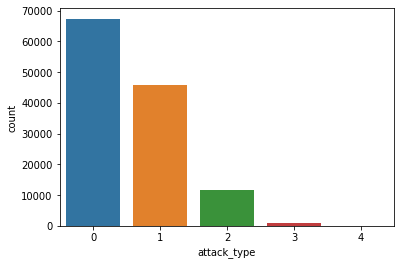

In [70]:
sns.countplot(train.attack_type)

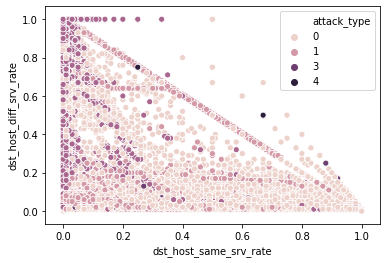

In [75]:
sns.scatterplot(x='dst_host_same_srv_rate', y ='dst_host_diff_srv_rate',hue='attack_type', data = train )

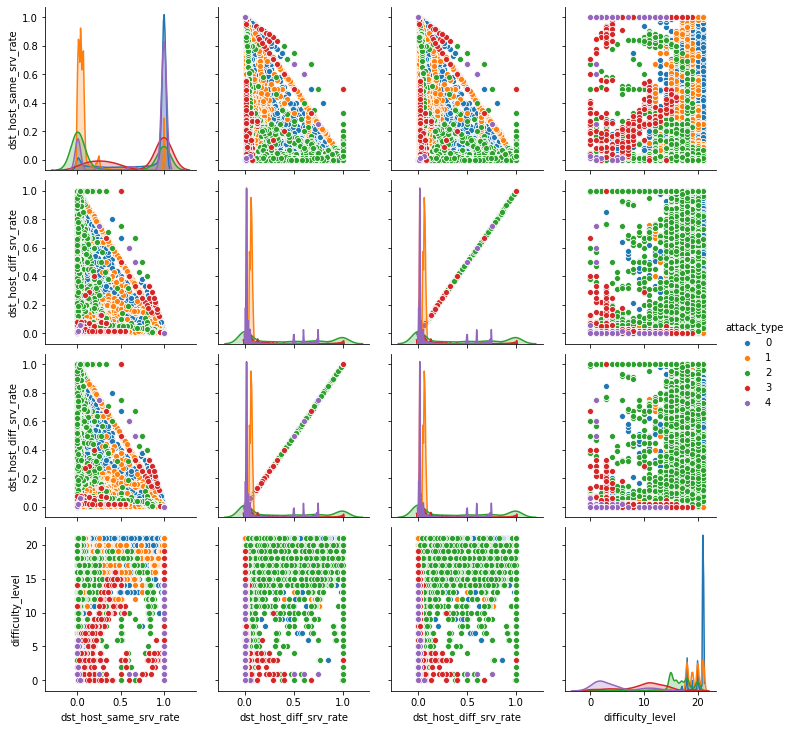

In [80]:
sns.pairplot(train,hue = 'attack_type', vars = ['dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_diff_srv_rate','difficulty_level'])

In [81]:
corelation =train[['duration', 'src_bytes', 'land', 'wrong_fragment', 'logged_in']]


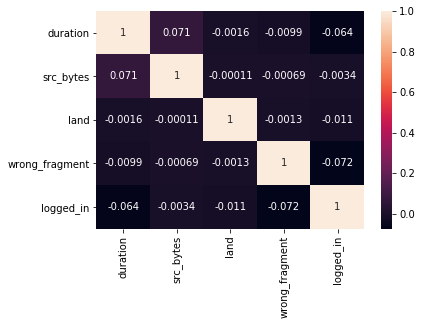

In [83]:
plt.figure()
heat_map = sns.heatmap(corelation.corr(), annot=True )
heat_map

In [84]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_depth=5)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
y_predict = RF.predict(X_test)
for i in y_predict:
    if i == 0:
        print("Normal")
    elif i == 1:
        print("Dos")
    elif i == 2:
        print("Prob")
    elif i == 3:
        print("R2L")
    else:
        print("U2r")
        
        
        

Normal
Dos
Dos
Dos
Prob
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Prob
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Prob
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Prob
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Prob
Normal
Nor

Prob
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Prob
Prob
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Prob
Prob
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Prob
Dos
Normal
Normal
Dos
Normal
Dos
Prob
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Dos
Dos
Normal
Normal
Normal
Dos

Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Prob
Prob
Normal
Dos
Normal
Prob
Normal
Prob
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Prob
Normal
Dos
Dos
Dos
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Prob
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Prob
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal

Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Prob
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Dos
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Prob
Prob
Normal
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Prob
Prob
Prob
Normal
Dos
Dos
Normal
No

Normal
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Prob
Normal
Prob
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Prob
Normal
Prob
Dos
Prob
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Prob
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Prob
Dos
Normal
Prob
Normal
Dos
Dos
Prob
Prob
Normal
Normal
Dos
Dos
Normal
Normal
Pro

Normal
Dos
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Dos
Prob
Dos
Dos
Dos
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Prob
Prob
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Prob
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Prob
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Norma

Dos
Dos
Dos
Dos
Dos
Prob
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Prob
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Prob
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Norm

Dos
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Prob
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Prob
Dos
Dos
Prob
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Prob
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Prob
Prob
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Prob
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Prob
Dos
Prob
Normal
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Normal
Do

Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Prob
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Dos
Prob
Dos
Prob
Normal
Prob
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Prob
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Prob
Normal
Normal
Prob
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Dos
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Norma

Normal
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Prob
Dos
Dos
Normal
Normal
Dos
Prob
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Prob
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Normal
Dos
Prob
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Prob
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Prob
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Dos
Prob
Normal
Normal
Normal
Prob
Prob
Prob
Prob
Prob
Normal

Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Prob
Dos
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Prob
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Prob
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Prob
Dos
Prob
Prob
Prob
Dos
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Prob
Dos
Normal
Normal
No

Dos
Dos
Normal
Prob
Dos
Normal
Dos
Dos
Dos
Normal
Prob
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Prob
Normal
Dos
Prob
Normal
Normal
Dos
Prob
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Prob
Prob
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Prob
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Prob
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
No

Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Prob
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Prob
Normal
Normal
Prob
Prob
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Prob
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Prob
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Prob
Prob
Prob
Dos
Prob
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Dos
Dos
Dos
Normal
Normal
Prob
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos

Normal
Prob
Prob
Normal
Dos
Dos
Dos
Dos
Normal
Prob
Normal
Dos
Dos
Normal
Prob
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Prob
Normal
Normal
Prob
Dos
Dos
Dos
Normal
Normal
Prob
Normal
Prob
Prob
Dos
Prob
Prob
Dos
Normal
Normal
Normal
Prob
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Prob
Dos
Normal
Dos
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
No

Dos
Normal
Dos
Dos
Prob
Normal
Dos
Normal
Normal
Dos
Prob
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Dos
Prob
Dos
Prob
Prob
Dos
Prob
Dos
Dos
Prob
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Prob
Dos
Dos
Dos
Normal
Normal
Dos
Prob
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Prob
Normal
Dos
Dos
Prob
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Prob
Prob
Prob
Dos
Dos
Dos
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Prob
Dos
Normal
Dos
Prob
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal

Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Prob
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Prob
Dos
Normal
Normal
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Prob
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Prob
Dos
Dos
D

Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Prob
Prob
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Prob
Dos
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Prob
Normal
Prob
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Prob
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Do

Normal
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Prob
Normal
Dos
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Prob
Prob
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Prob
Dos
Dos
Dos
Dos
Normal
Prob
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
N

Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Dos
Normal
Prob
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Prob
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Prob
Dos
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Prob
Dos
Normal
Dos
Dos
Prob
Prob
Normal
Dos
Normal
Normal
Do

Dos
Dos
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Prob
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Prob
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Prob
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Prob
Normal
Normal
Dos
Normal
Normal
Prob
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Dos
Dos
Prob
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Dos
Prob
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Prob
Dos
Dos
Dos
Normal
Normal
Prob
Dos
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Prob
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
No

Dos
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Prob
Normal
Prob
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Prob
Prob
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Prob
Normal
Prob
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Norm

Normal
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Prob
Dos
Normal
Prob
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Prob
Prob
Dos
Normal
Normal
Normal
Prob
Prob
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Prob
Dos
Prob
Normal
Dos
Normal
Dos
Prob
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Prob
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Prob
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Prob
Dos
Dos
Normal
Normal
Dos
Normal
Do

Normal
Dos
Normal
Dos
Normal
Prob
Prob
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Prob
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Prob
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Dos
Dos
Dos
Prob
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Prob
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Prob
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Prob
Dos
Norm

Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Prob
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Prob
Dos
Prob
Dos
Normal
Normal
Dos
Dos
Prob
Prob
Dos
Dos
Prob
Normal
Prob
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Prob
Dos
Dos
Normal
Dos
Prob
Dos
Dos
Normal
Norm

Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Prob
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Dos
Dos
Prob
Dos
Prob
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Prob
Prob
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Prob
Dos
Dos
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos


Normal
Dos
Normal
Dos
Normal
Normal
Dos
Prob
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Prob
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Prob
Normal
Prob
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Dos
Prob
Dos
Dos
Dos
Normal
Dos
Normal
Prob
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Prob
Normal
Dos
Dos
Normal
Prob
Normal
Prob
Normal
Normal
Dos
Prob
Dos
Normal
Dos
Dos
Dos
Normal
Prob
Normal
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Normal

Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Prob
Dos
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Prob
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Prob
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Dos
Normal
Normal
Normal
Prob
Normal
Prob
Dos
P

Normal
Dos
Normal
Prob
Dos
Dos
Dos
Dos
Prob
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Prob
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Prob
Prob
Normal
Dos
Normal
Prob
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Norm

Prob
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Prob
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Normal
Normal
Prob
Prob
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Prob
Normal
Dos
Dos
Dos
Dos
Dos
Prob
Prob
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Prob
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Prob
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Prob
Normal


Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Prob
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Prob
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Prob
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Norma

Normal
Normal
Normal
Normal
Prob
Dos
Normal
Prob
Normal
Normal
Normal
Dos
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Prob
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Prob
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Prob
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Dos
Prob
Dos
Dos
Prob
Normal
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Prob
Normal
Norma

Normal
Normal
Dos
Dos
Normal
Prob
Dos
Dos
Normal
Dos
Prob
Dos
Prob
Dos
Normal
Dos
Prob
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Dos
Dos
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Prob
Dos
Prob
Prob
Normal
Dos
Dos
Normal
Prob
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Dos
Normal
Prob
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Prob
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Prob
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Prob
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Prob
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal


Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Prob
Normal
Dos
Dos
Dos
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Prob
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Dos
Normal
Prob
Normal
Dos
Dos
Dos
Normal
Prob
Dos
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Prob
Dos
Normal
Normal
Prob
Prob
Dos
Normal
Dos
Dos
Normal
Dos
Prob
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Prob
Normal
Normal
Prob
Normal
Normal
Normal
Prob
Normal
Dos
Prob
Prob
Normal
Normal
Normal
Dos
Prob
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Prob
Dos
Normal


Normal
Prob
Normal
Dos
Dos
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Prob
Dos
Dos
Dos
Dos
Normal
Dos
Prob
Dos
Prob
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Prob
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Prob
Prob
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Prob
Normal
Normal
Prob
Prob
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
N

Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Prob
Dos
Dos
Normal
Dos
Normal
Prob
Normal
Dos
Dos
Normal
Prob
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Prob
Normal
Dos
Prob
Dos
Normal
Normal
Normal
Dos
Prob
Prob
Normal
Normal
Normal
Dos
Dos
Normal
Prob
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Prob
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Dos
Prob
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Nor

Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Prob
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Prob
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Prob
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Prob
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Norm

Dos
Prob
Normal
Normal
Prob
Normal
Normal
Normal
Prob
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Prob
Dos
Dos
Prob
Normal
Normal
Normal
Dos
Prob
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Prob
Dos
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Prob
Dos
Prob
Dos
Dos
Dos
Normal
Prob
Normal
Normal
Dos
Normal
Prob
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Dos
Dos
Normal
Prob
Normal
Normal
Dos
Dos
Prob
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Dos
N

Normal
Normal
Prob
Prob
Prob
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Prob
Prob
Prob
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Prob
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Prob
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Prob
Dos
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Prob
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Prob
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Prob
Normal
Dos
Dos
Normal
Dos

Normal
Normal
Dos
Normal
Dos
Normal
Prob
Dos
Prob
Dos
Dos
Normal
Normal
Prob
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Prob
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Prob
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Prob
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Prob
Prob
Normal
Normal
Dos
Dos
Normal
Prob
Prob
Normal
Normal
Prob
Prob
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Dos
Prob
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos

Dos
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Prob
Dos
Prob
Normal
Normal
Dos
Dos
Prob
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Prob
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Dos
Prob
Dos
Normal
Normal
Normal
Normal
Prob
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Norm

Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Prob
Prob
Prob
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Normal
Prob
Normal
Normal
Dos
Dos
Dos
Prob
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Prob
Dos
Dos
Normal
Dos
Dos
N

Normal
Prob
Dos
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Prob
Prob
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Prob
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Prob
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Prob
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Prob
Normal
Normal
Prob
Dos
Normal
Dos
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Prob
Do

Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Prob
Normal
Normal
Dos
Prob
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Prob
Normal
Prob
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Dos
Normal
Dos
Prob
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Dos
Prob
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Dos
Normal

Normal
Normal
Normal
Dos
Prob
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Prob
Normal
Normal
Normal
Prob
Prob
Normal
Dos
Normal
Dos
Prob
Normal
Dos
Prob
Normal
Dos
Prob
Dos
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Dos
Prob
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Prob
Normal
Normal
Prob
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Dos
Dos
Prob
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Prob
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Norma

Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Prob
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Prob
Normal
Dos
Dos
Prob
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Prob
Dos
Prob
Normal
Normal
Dos
Normal
Dos
Dos
Prob
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Prob
Prob
Dos
Prob
Normal
Dos
Prob
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Prob
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Prob
Dos
Prob
Dos
Normal
Dos
Normal
Normal
Normal
D

Prob
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Prob
Prob
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Dos
Normal
Dos
Dos
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Dos
Normal
Prob
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Prob
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos

Normal
Normal
Dos
Normal
Dos
Dos
Prob
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Prob
Dos
Normal
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Dos
Prob
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Prob
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Prob
Dos
Dos
Normal
Prob
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Prob
Dos
Dos
Normal
Dos
Normal
Normal
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Prob
Normal
Prob
Normal
Normal
Dos
Normal
Prob
Dos
Normal

Normal
Normal
Normal
Dos
Normal
Prob
Dos
Normal
Dos
Prob
Normal
Prob
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Prob
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Prob
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Prob
Prob
Prob
Normal
Dos
Prob
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Prob
Dos
Normal
Normal
Dos
Prob
Normal
Dos
Prob
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Prob
Normal
Dos
Prob
Normal
Normal
Dos
Dos
Norm

Normal
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Prob
Dos
Prob
Dos
Dos
Prob
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Dos
Normal
Prob
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal


Normal
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Prob
Prob
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Dos
Dos
Normal
Prob
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Prob
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal


Dos
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Prob
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Prob
Normal
Prob
Normal
Dos
Normal
Prob
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Prob
Dos
Dos
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Prob
Dos
Dos
Prob
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Prob
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Prob
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
D

Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Prob
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Prob
Dos
Prob
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Prob
Prob
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Prob
Dos
Normal
Normal
Normal
Prob
Normal
Prob
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Prob
Prob
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Norm

Normal
Dos
Dos
Normal
Normal
Prob
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Prob
Normal
Dos
Dos
Normal
Dos
Prob
Normal
Prob
Dos
Dos
Normal
Prob
Dos
Normal
Prob
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Prob
Dos
Normal
Dos
Prob
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Normal

Dos
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Prob
Normal
Dos
Normal
Prob
Dos
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Prob
Dos
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Prob
Normal
Prob
Normal
Dos
Normal
Normal
Dos
Dos
No

Dos
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Prob
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Prob
Dos
Dos
Normal
Dos
Normal
Prob
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Prob
Normal
Prob
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Prob
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Prob
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Prob
Normal
Prob
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Dos
Prob
Normal
Prob
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Prob
Normal
Dos
Dos
Normal
Normal
Prob
Dos
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Dos
D

Dos
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Prob
Normal
Dos
Dos
Normal
Dos
Prob
Dos
Normal
Prob
Dos
Normal
Prob
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Dos
Dos
Dos
Normal
Prob
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Prob
Prob
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Prob
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Prob
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Prob
Normal
Prob
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Dos
Dos
Dos
Prob
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Dos
Normal
No

Normal
Normal
Dos
Prob
Dos
Normal
Prob
Dos
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Prob
Dos
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Dos
Normal
Prob
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Prob
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal


Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Prob
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Prob
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Prob
Prob
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Normal
Do

In [86]:
RF.score(X_test,y_test)*100

98.3061947429524

In [87]:
unique, counts = np.unique(y_predict, return_counts=True)
counts

array([55448, 36444,  8887], dtype=int64)

[[53819    17    23     0     0]
 [  317 36396     7     0     0]
 [  475    30  8857     0     0]
 [  797     1     0     0     0]
 [   40     0     0     0     0]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     53859
         1.0       1.00      0.99      0.99     36720
         2.0       1.00      0.95      0.97      9362
         3.0       0.00      0.00      0.00       798
         4.0       0.00      0.00      0.00        40

    accuracy                           0.98    100779
   macro avg       0.59      0.59      0.59    100779
weighted avg       0.98      0.98      0.98    100779



C:\Users\arif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


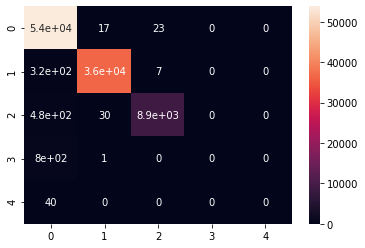

In [88]:
from sklearn.metrics import classification_report , confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
sns.heatmap(cm, annot=True)

In [106]:
 print("False Alarm Rate = %g" % (cm[0][1]/(cm[0][0] + cm[0][1])*100))

False Alarm Rate = 0.0315774


In [90]:
unique1, counts1 = np.unique(y_test, return_counts=True)
counts1

array([53859, 36720,  9362,   798,    40], dtype=int64)

In [91]:

import math 
Normal =math.floor((53859/56237)*100)
Normal

95

In [92]:
dos =math.floor((35827/36720)*100)
dos

97

In [93]:
prob= math.floor((8715/9362)*100)
dos

97

In [94]:
R2L= math.floor((349/798)*100)
R2L

43

In [95]:
U2R= math.floor((27/40)*100)
U2R

67

In [96]:
x = test.drop(['attack_type'],axis = 1)
y = test.attack_type
x = x.values.astype(np.float)
y = y.values.astype(np.float)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.70, random_state=42)



In [97]:
X_train

array([[0.000e+00, 2.180e+02, 3.737e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 2.840e+02, 4.482e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 8.020e+02, 3.350e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 0.000e+00, 4.400e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.820e+02, 1.620e+02, 5.990e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

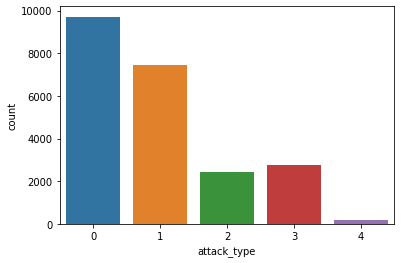

In [99]:
sns.countplot(test.attack_type)

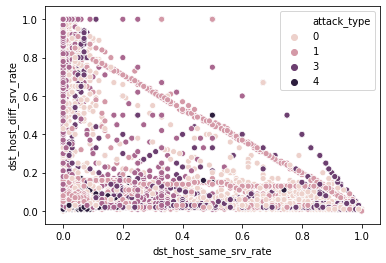

In [100]:
sns.scatterplot(x='dst_host_same_srv_rate', y ='dst_host_diff_srv_rate',hue='attack_type', data = test )

In [104]:
corelation =test[['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'logged_in']]


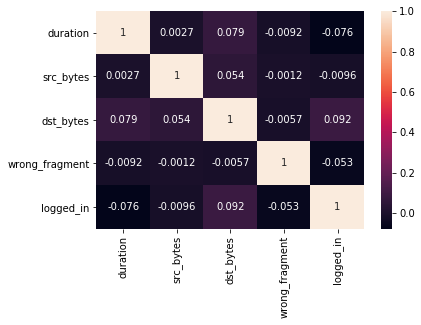

In [105]:
plt.figure()
heat_map = sns.heatmap(corelation.corr(), annot=True )
heat_map

In [107]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_depth=5)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [108]:
y_predict = RF.predict(X_test)
for i in y_predict:
    if i == 0:
        print("Normal")
    elif i == 1:
        print("Dos")
    elif i == 2:
        print("Prob")
    elif i == 3:
        print("R2L")
    else:
        print("U2R")
        
        
        

Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Dos
R2L
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
R2L
Dos
Prob
Normal
R2L
Normal
Dos
Normal
R2L
Prob
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Prob
R2L
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
R2L
Normal
Normal
Dos
Dos
Normal
Prob
Dos
Dos
R2L
Prob
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
R2L
Normal
Normal
Normal
R2L
Dos
Normal
Normal
Normal
Dos
Dos
Prob
Dos
R2L
Normal
Dos
Normal
Normal
Dos
Prob
Normal
Dos
Dos
Normal
R2L
Dos
Normal
Normal
Dos
Prob
R2L
Normal
Dos
Prob
Normal
Dos
Dos
Dos
Prob
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Dos
Prob
Dos
Prob
Prob
Dos
Dos
Dos
Prob
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
R2L
Normal
Dos
Prob
Prob
Normal
Normal
Prob
Dos
Dos
Normal
Normal
Prob
Dos
Dos
Normal

Normal
Normal
Normal
Normal
Dos
R2L
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Prob
Dos
Normal
Normal
R2L
Normal
R2L
Normal
R2L
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
R2L
Normal
Dos
Dos
Dos
Normal
Prob
Normal
R2L
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Prob
Dos
Normal
R2L
Normal
Normal
Normal
Normal
Normal
Normal
Prob
R2L
Dos
Dos
Dos
R2L
R2L
Dos
Dos
Normal
Dos
R2L
Normal
Dos
Normal
Prob
Prob
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
R2L
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Prob
R2L
R2L
R2L
Dos
Dos
Dos
R2L
Prob
Dos
Normal
Dos
R2L
Dos
Dos
R2L
Normal
Normal
Normal
Dos
R2L
Normal
Normal
Normal
R2L
Normal
R2L
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
R2L
Dos
Normal
Normal
Dos
Dos
Dos
Prob
Normal
Normal
Normal
Dos
Normal


Normal
Normal
Prob
Dos
Prob
Normal
R2L
Dos
R2L
Normal
Dos
R2L
Dos
Normal
Dos
Normal
Normal
R2L
Normal
Normal
Dos
R2L
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
R2L
Normal
Dos
Prob
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Dos
R2L
R2L
Dos
Dos
Dos
R2L
Prob
Dos
Prob
Dos
Dos
Prob
Normal
R2L
Prob
Dos
Dos
R2L
Dos
Prob
Normal
Dos
Dos
Dos
Dos
Prob
R2L
R2L
Normal
Normal
Normal
Prob
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Dos
Prob
Dos
Normal
Normal
Normal
R2L
Normal
Dos
Prob
Normal
R2L
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Prob
Dos
R2L
Dos
R2L
Normal
Normal
Dos
Dos
Prob
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Prob
Normal
Normal
Dos
Normal
Dos
Prob
Normal
Normal
R2L
Dos
Normal
Prob
R2L
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Normal
Normal
Prob
Normal
Dos
Dos
Dos
No

Dos
Normal
Normal
Dos
Normal
R2L
Normal
Normal
Dos
Normal
Dos
R2L
Prob
R2L
R2L
Normal
Prob
Normal
R2L
Prob
Dos
Dos
Dos
Prob
R2L
Normal
Prob
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Dos
Dos
Normal
R2L
Normal
Normal
Normal
Prob
Normal
Dos
Normal
R2L
Dos
Prob
Normal
Prob
Normal
Dos
Dos
Normal
Dos
Normal
Prob
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Prob
Prob
Dos
Normal
Normal
Normal
Prob
Prob
Dos
Dos
Prob
Normal
Dos
Normal
Normal
R2L
R2L
Normal
Dos
Normal
Normal
Dos
Prob
Normal
Dos
Dos
Normal
Dos
Prob
Normal
Dos
Dos
Dos
Prob
Normal
Dos
Dos
Prob
Dos
Normal
Normal
Normal
R2L
Prob
Dos
R2L
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Prob
Dos
R2L
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal

Dos
Dos
Normal
R2L
Normal
Normal
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Dos
R2L
Normal
R2L
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Prob
Normal
Dos
R2L
Dos
Normal
Prob
Prob
Normal
Dos
Normal
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Dos
R2L
R2L
Prob
Dos
Dos
R2L
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
R2L
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Normal
R2L
Normal
Dos
Dos
Dos
Normal
Normal
R2L
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Prob
Prob
Normal
Normal
Normal
Dos
R2L
Dos
Normal
Normal
Normal
R2L
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Prob
Normal
Normal
Prob
Prob
Normal
Normal
Norm

Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Prob
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Prob
Normal
R2L
Dos
Normal
Normal
Prob
Normal
Prob
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Prob
Dos
R2L
Normal
Dos
Normal
Dos
Dos
R2L
Prob
Dos
Prob
Normal
Dos
Dos
Normal
Dos
Prob
R2L
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
R2L
R2L
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Dos
Prob
Dos
Dos
Dos
Normal
Prob
Normal
Normal
Dos
Dos
Normal
Normal
Prob
R2L
Dos
Normal
Dos
R2L
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Dos
R2L
Normal
Dos
R2L
Normal
R2L
Normal
Normal
R2L
Prob
Dos
Normal
Normal
Normal
Normal
R2L
Normal
Prob
Prob
Prob
Dos
Prob
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Normal
R2L
Normal
Dos
Dos
R2L
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Prob
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
R2L
Dos
Prob
Dos
Prob
Normal
Pr

Dos
Normal
Normal
R2L
Normal
Normal
Normal
Normal
R2L
Normal
Normal
Dos
R2L
R2L
R2L
Dos
Normal
R2L
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Dos
Dos
R2L
Normal
Dos
Normal
Prob
R2L
Normal
Normal
R2L
Dos
Normal
Dos
Dos
R2L
Normal
Prob
Prob
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
R2L
R2L
Normal
Normal
Dos
Normal
R2L
Dos
Normal
Normal
R2L
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Prob
R2L
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
R2L
Normal
Normal
Normal
Normal
Prob
Normal
Prob
Prob
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
R2L
Normal
Prob
Normal
Prob
R2L
Normal
Dos
R2L
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Prob
Normal
Normal
R2L
Dos
Dos
R2L
Normal
R2L
Dos
Dos
Normal
Normal
Prob
Dos
Dos
Dos
Dos
Prob
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Prob
Normal
Dos
Prob
Dos
Dos
Normal
Dos
Dos
Dos
R2L
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
D

In [109]:
RF.score(X_test,y_test)*100

95.14606171978961

In [110]:
unique, counts = np.unique(y_predict, return_counts=True)
counts

array([7209, 5225, 1687, 1660], dtype=int64)

[[6729   20   48   38    0]
 [  28 5167    9    1    0]
 [  57   12 1570   32    0]
 [ 381    1    3 1549    0]
 [  14   25   57   40    0]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      6835
         1.0       0.99      0.99      0.99      5205
         2.0       0.93      0.94      0.94      1671
         3.0       0.93      0.80      0.86      1934
         4.0       0.00      0.00      0.00       136

    accuracy                           0.95     15781
   macro avg       0.76      0.74      0.75     15781
weighted avg       0.94      0.95      0.95     15781



C:\Users\arif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


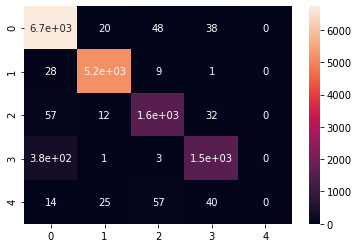

In [111]:
from sklearn.metrics import classification_report , confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
sns.heatmap(cm, annot=True)

In [112]:
 print("False Alarm Rate = %g" % (cm[0][1]/(cm[0][0] + cm[0][1])*100))

False Alarm Rate = 0.29634


In [113]:
unique1, counts1 = np.unique(y_test, return_counts=True)
counts1

array([6835, 5205, 1671, 1934,  136], dtype=int64)

In [114]:
import math 
Normal =math.floor((6835/7201)*100)
Normal

94

In [115]:
Dos= math.floor((5205/5252)*100)
Dos

99

In [116]:
Prob= math.floor((1671/1704)*100)
Prob

98

In [117]:
R2L = math.floor((927/935)*100)
R2L

99

In [118]:
U2R= math.floor((47/136)*100)
U2R

34

In [119]:
x = train20.drop(['attack_type'],axis = 1)
y = train20.attack_type
x = x.values.astype(np.float)
y = y.values.astype(np.float)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.70, random_state=42)

ValueError: could not convert string to float: 'SF'

In [120]:
X_train

array([[0.000e+00, 2.180e+02, 3.737e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 2.840e+02, 4.482e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 8.020e+02, 3.350e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 0.000e+00, 4.400e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.820e+02, 1.620e+02, 5.990e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

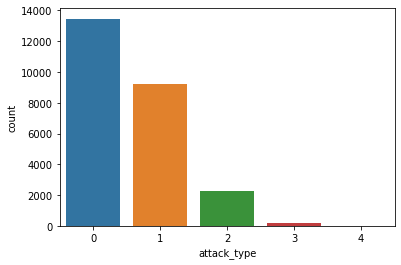

In [122]:
sns.countplot(train20.attack_type)

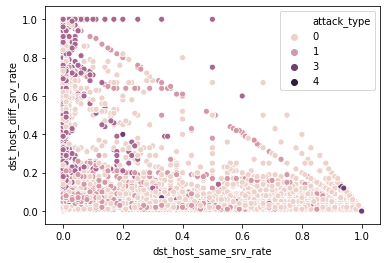

In [123]:
sns.scatterplot(x='dst_host_same_srv_rate', y ='dst_host_diff_srv_rate',hue='attack_type', data = train20 )

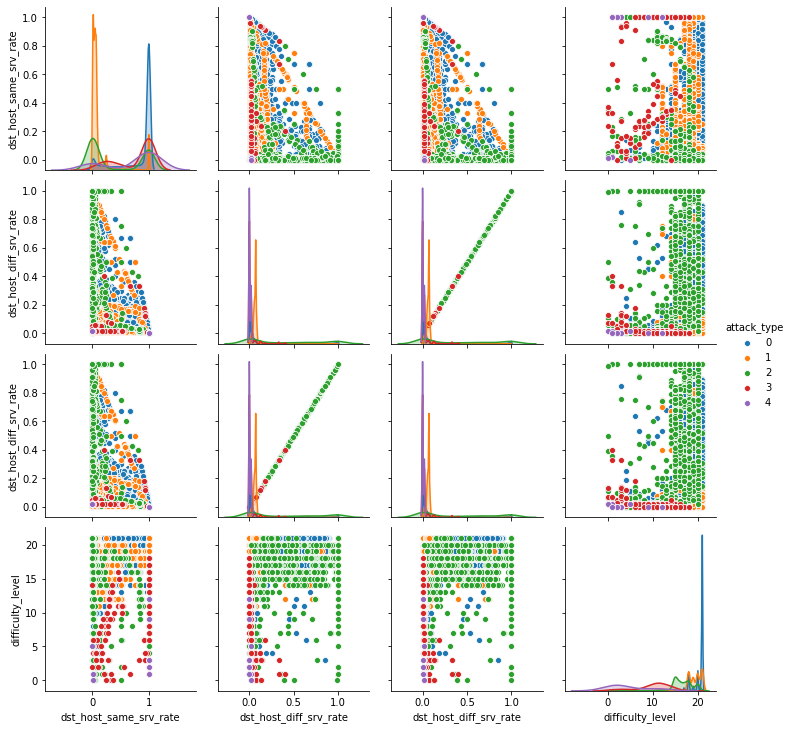

In [124]:

sns.pairplot(train20,hue = 'attack_type', vars = ['dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_diff_srv_rate','difficulty_level'])

In [126]:
corelation =train20[['duration', 'src_bytes', 'dst_bytes','wrong_fragment','urgent', 'logged_in']]


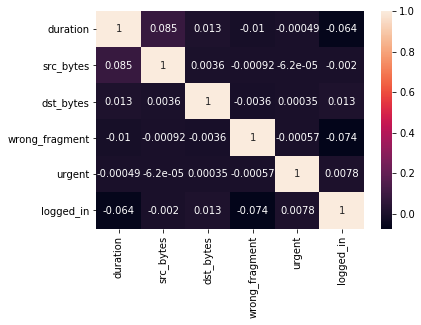

In [127]:
plt.figure()
heat_map = sns.heatmap(corelation.corr(), annot=True )
heat_map

In [128]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_depth=7)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [129]:
y_predict = RF.predict(X_test)
for i in y_predict:
    if i == 0:
        print("Normal")
    elif i == 1:
        print("Dos")
    elif i == 2:
        print("Prob")
    elif i == 3:
        print("R2L")
    else:
        print("U2R")
        
        
        

Normal
Dos
Normal
Normal
R2L
Normal
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Dos
R2L
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
R2L
Dos
Prob
Normal
R2L
Normal
Dos
Normal
R2L
Prob
Normal
Dos
Dos
Normal
Normal
Dos
R2L
Dos
Normal
Normal
Normal
Normal
Prob
R2L
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
R2L
Normal
Normal
Dos
Dos
Normal
Prob
Dos
Dos
R2L
Prob
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
R2L
Normal
Normal
Normal
R2L
Dos
Normal
Normal
Normal
Dos
R2L
Prob
Dos
R2L
Normal
Dos
Normal
Normal
Dos
Prob
Normal
Dos
Dos
Normal
R2L
Dos
Normal
Normal
Dos
Prob
R2L
Normal
Dos
Prob
R2L
Dos
Dos
Dos
Prob
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Dos
Prob
Dos
Prob
Prob
Dos
Dos
Dos
Prob
Dos
Dos
Normal
Normal
Dos
Normal
R2L
Normal
Dos
Normal
Dos
Dos
Dos
R2L
R2L
R2L
Dos
Prob
Prob
Normal
Normal
Prob
Dos
Dos
Normal
Normal
Prob
Dos
Dos
Normal
Dos
Prob
R2L
Norm

Dos
R2L
Normal
Dos
Dos
Dos
R2L
Prob
Normal
R2L
Dos
Normal
Normal
R2L
Dos
Dos
Normal
Prob
Dos
Normal
R2L
Normal
Normal
Normal
Normal
Normal
Normal
Prob
R2L
Dos
Dos
Dos
R2L
R2L
Dos
Dos
Normal
Dos
R2L
Normal
Dos
Normal
Prob
Prob
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
R2L
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
R2L
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Prob
R2L
R2L
R2L
Dos
Dos
Dos
R2L
Prob
Dos
Normal
Dos
R2L
Dos
Dos
R2L
Normal
Normal
Normal
Dos
R2L
Normal
Normal
Normal
R2L
Normal
R2L
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
R2L
Dos
Normal
Normal
Dos
R2L
Dos
Normal
Normal
Dos
Dos
Dos
Prob
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
R2L
Dos
R2L
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
R2L
Dos
Dos
Prob
Dos
Normal
R2L
Dos
R2L
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Prob
Normal
Dos
Normal
Dos
Dos
Normal
R2L
Dos
Normal
Dos
R2L
Prob

Normal
Normal
Prob
Prob
Normal
R2L
Prob
Normal
Normal
Normal
Normal
Prob
Normal
Dos
R2L
Normal
Prob
Normal
Dos
Dos
R2L
Dos
Normal
R2L
Dos
R2L
Normal
Dos
R2L
Normal
R2L
Dos
Dos
Dos
Dos
Dos
Normal
Dos
Normal
R2L
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Prob
Prob
Normal
R2L
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
R2L
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Normal
R2L
Normal
Normal
Normal
Prob
Dos
R2L
Normal
Normal
Dos
Dos
Dos
Prob
R2L
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Prob
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
R2L
Dos
R2L
R2L
R2L
Dos
Dos
R2L
Normal
Normal
R2L
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
R2L
Normal
Prob
Normal
Normal
R2L
Dos
R2L
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Prob
Normal
R2L
Normal
Dos
Normal
Dos
Dos
Normal
Normal
R2L
Prob
Normal
Normal
Normal
Normal
R2L
Normal
Prob
R2

Normal
Prob
Dos
R2L
Dos
Prob
Dos
Normal
Normal
Normal
Prob
Dos
Dos
Dos
R2L
Prob
Dos
Dos
Normal
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
R2L
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Prob
Dos
Dos
Dos
R2L
Dos
Dos
R2L
Dos
R2L
Dos
Normal
Dos
Prob
Normal
Dos
Dos
Normal
Prob
Prob
Normal
Dos
Dos
R2L
Dos
Dos
Prob
Normal
Normal
Dos
Dos
Prob
Normal
Dos
R2L
Dos
Normal
Normal
R2L
Normal
Dos
R2L
Normal
Prob
Normal
Normal
R2L
Prob
R2L
Normal
Dos
Normal
Prob
Dos
Dos
Dos
Normal
Prob
Dos
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
R2L
Prob
Normal
Dos
R2L
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Prob
Normal
Normal
R2L
Normal
Prob
Normal
Normal
Normal
Dos
Dos
Normal
R2L
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
R2L
Prob
R2L
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
R2L
Normal
Dos
Normal
Normal
R2L
Dos
Dos
Dos
Normal
R2L
Normal
Normal
Prob
Normal
Dos
Normal
R2L
No

Normal
Dos
Dos
Normal
Dos
Normal
Prob
Dos
Normal
R2L
Dos
R2L
Dos
Dos
Normal
Dos
R2L
Normal
Normal
R2L
Normal
Dos
Prob
R2L
Dos
Normal
Dos
Dos
Dos
Normal
R2L
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Prob
Normal
Prob
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
R2L
Dos
Dos
Normal
Prob
Dos
Dos
Normal
Dos
Normal
R2L
Normal
Dos
R2L
Normal
Normal
R2L
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Prob
Dos
Normal
Prob
R2L
R2L
Dos
Normal
Dos
Normal
Prob
Normal
Normal
R2L
Normal
Normal
R2L
Normal
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
R2L
Dos
Dos
R2L
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
R2L
Normal
Dos
Dos
R2L
Normal
Dos
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Normal
R2L
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Prob
Normal
Normal
Dos
Dos
Dos
Pro

Prob
Normal
Prob
Dos
Prob
Normal
Normal
R2L
Dos
Normal
Prob
Dos
Normal
Prob
Dos
Normal
Dos
Dos
Normal
Prob
Dos
Normal
Normal
Prob
R2L
R2L
Normal
Normal
Normal
Normal
Normal
Normal
R2L
Normal
R2L
Normal
Dos
Normal
Normal
Normal
U2R
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Prob
U2R
Prob
Dos
Dos
Dos
Dos
Prob
R2L
Normal
Normal
Normal
Normal
Normal
Normal
Prob
R2L
R2L
Normal
R2L
Normal
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Dos
Dos
R2L
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
R2L
Normal
Dos
R2L
Normal
Dos
Normal
R2L
R2L
Normal
U2R
Dos
Dos
Normal
R2L
Dos
Normal
Dos
Normal
Normal
Dos
Normal
R2L
Normal
Dos
Normal
Normal
R2L
R2L
Dos
Normal
Normal
Prob
Normal
Normal
Dos
Dos
Dos
R2L
Dos
Normal
Normal
Normal
R2L
Prob
R2L
Normal
Normal
Normal
R2L
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Prob
Dos
R2L
Dos
R2L
Dos
Normal
Normal
R2L
Dos
Normal
Normal
Dos
Normal
Normal
Dos
R2L
Dos
Prob
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Normal


Normal
Normal
Dos
Normal
Dos
Dos
Dos
R2L
R2L
Normal
Dos
Prob
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
R2L
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
R2L
Normal
Normal
R2L
Normal
R2L
Normal
Normal
Dos
R2L
Prob
Prob
Dos
Dos
Dos
Dos
Normal
R2L
Prob
R2L
Dos
Dos
Dos
Normal
R2L
Dos
Normal
Dos
Prob
Normal
Prob
Prob
Dos
Dos
Normal
R2L
Dos
R2L
Normal
Normal
Normal
Normal
Normal
Dos
Prob
R2L
Normal
Normal
Prob
Dos
Normal
Dos
Prob
Normal
R2L
Dos
R2L
Normal
Normal
Normal
Normal
Dos
Normal
Normal
R2L
Normal
Dos
Normal
Dos
R2L
Dos
Prob
Prob
Dos
Normal
Normal
Dos
Dos
Normal
R2L
Dos
R2L
Normal
Dos
R2L
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
R2L
Normal
Dos
Normal
R2L
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Normal
R2L
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Prob
Normal
Dos
Prob
Dos
Dos
R2L
Dos
Dos
Normal
Normal
R2L
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Prob
Normal
Normal
R2L
Dos
Norm

In [130]:
RF.score(X_test,y_test)*100

98.39680628604017

In [131]:
unique, counts = np.unique(y_predict, return_counts=True)
counts

array([6804, 5195, 1720, 1991,   71], dtype=int64)

[[6731    7   51   46    0]
 [  11 5184    8    2    0]
 [  14    4 1650    3    0]
 [  39    0    3 1892    0]
 [   9    0    8   48   71]]
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      6835
         1.0       1.00      1.00      1.00      5205
         2.0       0.96      0.99      0.97      1671
         3.0       0.95      0.98      0.96      1934
         4.0       1.00      0.52      0.69       136

    accuracy                           0.98     15781
   macro avg       0.98      0.89      0.92     15781
weighted avg       0.98      0.98      0.98     15781



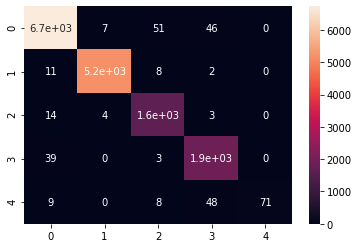

In [132]:
from sklearn.metrics import classification_report , confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
sns.heatmap(cm, annot=True)

In [133]:
 print("False Alarm Rate = %g" % (cm[0][1]/(cm[0][0] + cm[0][1])*100))

False Alarm Rate = 0.103888


In [134]:
unique1, counts1 = np.unique(y_test, return_counts=True)
counts1

array([6835, 5205, 1671, 1934,  136], dtype=int64)

In [135]:
import math 
Normal =math.floor((6835/6864)*100)
Normal

99

In [136]:
Dos=math.floor((5195/5205)*100)
Dos

99

In [137]:
Prob=math.floor((1671/1710)*100)
Prob

97

In [138]:
R2L = math.floor((1934/2022)*100)
R2L

95

In [139]:
U2R = math.floor((82/136)*100)
U2R

60

In [140]:
x = test.drop(['attack_type'],axis = 1)
y = test.attack_type
x = x.values.astype(np.float)
y = y.values.astype(np.float)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.70, random_state=42)

In [141]:
X_train

array([[0.000e+00, 2.180e+02, 3.737e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 2.840e+02, 4.482e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 8.020e+02, 3.350e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 0.000e+00, 4.400e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.820e+02, 1.620e+02, 5.990e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [142]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train, y_train)


C:\Users\arif\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [143]:
y_predict = svc.predict(X_test)
for i in y_predict:
    if i == 0:
        print("Normal")
    elif i == 1:
        print("Dos")
    elif i == 2:
        print("Prob")
    elif i == 3:
        print("R2L")
    else:
        print("U2R")
        
        
        

Normal
Dos
Normal
Prob
R2L
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
U2R
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Normal
R2L
Normal
Prob
R2L
R2L
Normal
Dos
Normal
R2L
Prob
Normal
Dos
Dos
U2R
Normal
Dos
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Dos
U2R
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
R2L
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Normal
R2L
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
U2R
Normal
Normal
Normal
R2L
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Normal
U2R
Prob
Normal
Normal
Normal
Normal
R2L
U2R
Normal
Normal
Normal
Normal
R2L
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal


Normal
Normal
Prob
Normal
R2L
Normal
R2L
Normal
Normal
Dos
Normal
Normal
Normal
Dos
R2L
Normal
Normal
Normal
Normal
Normal
Normal
R2L
Normal
Normal
Prob
U2R
Prob
Normal
Normal
Prob
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Prob
R2L
Normal
Normal
U2R
Dos
Normal
Normal
Normal
R2L
R2L
Normal
Prob
Normal
R2L
Prob
Dos
R2L
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Prob
R2L
Normal
Normal
Dos
Normal
U2R
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
R2L
Normal
Normal
Dos
U2R
Dos
Normal
R2L
Normal
Normal
Normal
Normal
Normal
Normal
Normal
R2L
Normal
Normal
R2L
Normal
Normal
Normal
Normal
Normal
R2L
Prob
Normal
Normal
Normal
Normal
U2R
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Prob
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
R2L
Normal
Normal
Normal
Prob
R2L
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Prob
Normal
Normal
Normal
Normal
Prob
Normal
Prob
R2L
Normal
Dos
Dos
Normal
Prob
Normal
Dos
Normal
Normal


Dos
Normal
Normal
Normal
Normal
Dos
Normal
U2R
Normal
Normal
Normal
Normal
Normal
Normal
Normal
R2L
Normal
Prob
Dos
Dos
Normal
Normal
U2R
Dos
R2L
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
R2L
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Normal
R2L
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Normal
U2R
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Normal
R2L
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
U2R
R2L
Normal
Normal
Normal
Normal
Normal
Normal
R2L
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
R2L
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
N

Normal
U2R
Normal
Normal
Normal
R2L
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
R2L
R2L
Normal
Normal
Normal
Normal
Normal
Normal
Normal
R2L
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Normal
U2R
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
R2L
Prob
Normal
Normal
Normal
U2R
Prob
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
U2R
Normal
Prob
Normal
Normal
Normal
R2L
Normal
Prob
R2L
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
U2R
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
U2R
Normal
Normal
R2L
R2L
Normal
Normal
R2L
Normal
Dos
Normal
Normal
U2R
Normal
R2L
Dos
Normal
Normal
Normal
Normal
Normal
Normal
U2R
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Dos
Dos
Normal
R2L
Dos
Normal
R2L
R2L
Normal
Dos
Normal
Normal
R2L
Normal
U2R
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Prob
R2L
Normal
Dos
Normal
Normal
Normal
Normal
R2L
Normal
Dos
Normal
Normal

Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
R2L
Normal
Normal
Dos
Prob
Normal
Dos
Normal
U2R
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Normal
R2L
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
R2L
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
R2L
U2R
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
U2R
Dos
Normal
Normal
Dos
Normal
Normal
R2L
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
R2L
Dos
Dos
R2L
Normal
R2L
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Dos
U2R
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Prob
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
U2R
R2L
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
R2L
Normal
Normal
R2L
Normal

Normal
R2L
R2L
Normal
Dos
Prob
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
R2L
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
U2R
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
R2L
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
U2R
Normal
Prob
Normal
Normal
R2L
Normal
Normal
R2L
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
R2L
Dos
Normal
R2L
Normal
Normal
Normal
U2R
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
R2L
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Prob
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Prob
Dos
Dos
Prob
Prob
Normal
Normal
Normal
Prob
Normal
Normal
Prob
Normal
Normal
R2L
Normal
U2R
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Normal
U2R
Normal
R2L
Normal
Normal
Normal
Normal
Normal
Normal
Norm

Normal
Normal
Normal
Dos
Normal
Normal
Dos
R2L
R2L
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Prob
Prob
Normal
Normal
Dos
U2R
R2L
Normal
Dos
Normal
Normal
Prob
Dos
Dos
Normal
Normal
Normal
Normal
R2L
Prob
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Prob
Normal
R2L
Normal
Normal
U2R
Normal
Normal
Normal
Normal
U2R
Dos
Normal
Dos
U2R
Normal
Normal
R2L
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Normal
R2L
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
R2L
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Prob
Dos
Normal
Dos
Dos
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
U2R
Prob
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
U2R
Normal
Normal
Normal
Normal
R2L
Normal
Normal
Normal
Normal

Normal
Normal
Normal
Normal
Normal
U2R
Normal
Normal
Normal
Normal
Normal
R2L
Dos
Normal
R2L
Dos
Prob
Normal
Dos
R2L
Normal
Normal
Dos
Normal
R2L
Normal
Normal
R2L
Normal
Dos
Prob
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
R2L
Normal
Normal
Normal
R2L
Normal
Normal
Normal
Normal
R2L
Normal
Normal
Normal
Normal
Dos
R2L
Normal
Normal
Normal
Normal
Normal
Normal
Normal
U2R
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
U2R
Normal
Normal
Normal
Normal
Dos
Normal
U2R
Normal
Prob
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Dos
R2L
Normal
Dos
Normal
Normal
Prob
Prob
Normal
R2L
Prob
Normal
Normal
Normal
Normal
Normal
U2R
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
U2R
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Normal
R2L
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
U2R
Prob
Normal
Norm

Normal
Dos
R2L
Dos
Normal
Normal
Normal
Prob
R2L
Normal
Normal
U2R
Normal
Normal
Prob
R2L
Normal
R2L
Normal
R2L
Normal
Normal
Normal
R2L
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
R2L
Normal
R2L
Normal
Normal
R2L
Prob
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
U2R
U2R
Normal
Normal
R2L
Normal
Normal
Normal
Normal
Dos
Normal
Normal
U2R
R2L
Normal
U2R
Normal
Normal
Normal
U2R
R2L
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
U2R
Dos
Normal
Normal
Prob
Prob
R2L
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
U2R
Dos
Normal
U2R
Prob
Normal
Normal
Normal
Prob
U2R
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
R2L
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
R2L
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
R2L
Normal
Normal
Normal
Dos
Normal
R2L
Normal
Pro

In [144]:
svc.score(X_test,y_test)*100

67.84107471009442

In [145]:
unique, counts = np.unique(y_predict, return_counts=True)
counts

array([10577,  2179,  1181,  1232,   612], dtype=int64)

[[6451    3  241   70   70]
 [2667 2175    1   14  348]
 [ 738    1  930    2    0]
 [ 642    0    4 1122  166]
 [  79    0    5   24   28]]
              precision    recall  f1-score   support

         0.0       0.61      0.94      0.74      6835
         1.0       1.00      0.42      0.59      5205
         2.0       0.79      0.56      0.65      1671
         3.0       0.91      0.58      0.71      1934
         4.0       0.05      0.21      0.07       136

    accuracy                           0.68     15781
   macro avg       0.67      0.54      0.55     15781
weighted avg       0.79      0.68      0.67     15781



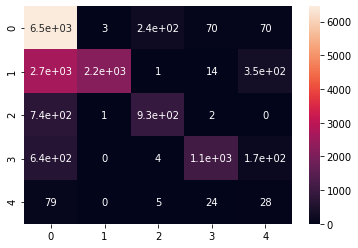

In [146]:
from sklearn.metrics import classification_report , confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
sns.heatmap(cm, annot=True)

In [147]:
 print("False Alarm Rate = %g" % (cm[0][1]/(cm[0][0] + cm[0][1])*100))

False Alarm Rate = 0.0464828


In [148]:
unique1, counts1 = np.unique(y_test, return_counts=True)
counts1

array([6835, 5205, 1671, 1934,  136], dtype=int64)

In [149]:
import math 
Normal =math.floor((6545/6835)*100)
Normal

95

In [150]:
Dos =math.floor((5125/5205)*100)
Dos

98

In [151]:
Prob=math.floor((1671/1730)*100)
Prob

96

In [152]:
R2L = math.floor((1698/1930)*100)
R2L

87

In [153]:
U2R = math.floor((136/161)*100)
U2R

84

In [154]:
x = train.drop(['attack_type'],axis = 1)
y = train.attack_type
x = x.values.astype(np.float)
y = y.values.astype(np.float)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.70, random_state=42)

In [155]:
X_train

array([[   0.,   28.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,   43.,   72., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,  309., 4281., ...,    0.,    0.,    0.],
       [   0.,   43.,   70., ...,    0.,    0.,    0.]])

In [156]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train, y_train)


C:\Users\arif\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [157]:
y_predict = svc.predict(X_test)
for i in y_predict:
    if i == 0:
        print("Normal")
    elif i == 1:
        print("Dos")
    elif i == 2:
        print("Prob")
    elif i == 3:
        print("R2L")
    else:
        print("U2R")
        
        
        

Normal
Dos
Dos
Dos
Prob
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Prob
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Prob
Normal
Dos
R2L
Normal
Prob
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
R2L
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Prob
Normal
Normal
Dos
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Prob
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Prob
Normal
Normal
R2L
Normal
Normal
Dos
Normal
R2L
Prob
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Prob
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Prob
Normal
Normal
Dos
Normal
N

Dos
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
R2L
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Prob
Prob
Dos
Prob
Normal
R2L
Normal
Dos
Dos
Prob
Dos
Dos
Prob
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Prob
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Prob
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
U2R
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Dos
R2L
Normal
Normal
Dos
Normal
Normal
Normal
R2L
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Prob
Prob
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Prob
Normal
R2L
Normal
Normal
R2L
Dos
Normal

Normal
Prob
Normal
Normal
Normal
Prob
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Prob
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Prob
Dos
R2L
Normal
Normal
U2R
Dos
Prob
Dos
Dos
Dos
Dos
Normal
R2L
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
R2L
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
U2R
Normal
Normal
Normal
Normal
Dos
Prob
Prob
Dos
Dos
Normal
Normal
R2L
Normal
Normal
Normal
Prob
Normal
Normal
Dos
R2L
Dos
Dos
Prob
Normal
Dos
Normal
Dos
Prob
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Prob
Dos
Normal
R2L
Normal
Normal
R2L
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Prob
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Prob
Prob
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
U2R
Normal
R2L
Dos
Normal
Prob
N

Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Prob
Normal
Dos
Dos
Normal
R2L
Prob
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Normal
R2L
Normal
Normal
Normal
Normal
Dos
Normal
Normal
R2L
Normal
Normal
Dos
Dos
Prob
R2L
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
R2L
Dos
Normal
Prob
R2L
Normal
Prob
Prob
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Prob
Dos
Normal
Dos
Normal
Normal
Normal
R2L
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Prob
Prob
Normal
Dos
Normal
Dos
Prob
Dos
Dos
Normal
Dos
U2R
Normal
Normal
R2L
Dos
Dos
R2L
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
R2L
U2R
Dos
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
No

Dos
Dos
Dos
Normal
Normal
Prob
Normal
R2L
Normal
Dos
Prob
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
R2L
Normal
Normal
Dos
R2L
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Dos
Normal
Dos
Prob
Prob
Normal
R2L
Dos
Dos
Normal
Prob
Dos
Normal
R2L
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Prob
Dos
Normal
Prob
Dos
Normal
Normal
Normal
R2L
Prob
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Dos
Dos
Prob
Normal
Prob
Normal
Normal
Dos
Normal
U2R
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Dos
R2L
R2L
Prob
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
R2L
Dos
Dos
Dos
Normal
Dos
Dos
Norma

Dos
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Prob
R2L
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Dos
Dos
Normal
Dos
Normal
Prob
Prob
Prob
Prob
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
R2L
Normal
Normal
Prob
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Dos
Dos
Prob
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Normal
R2L
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
R2L
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Prob
R2L
Normal
Normal
Dos
R2L
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
R2L
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Normal
Normal
Dos
Normal


Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
R2L
Normal
Dos
Normal
Prob
Normal
Normal
Dos
Normal
R2L
Dos
Dos
R2L
Normal
Dos
Prob
Dos
Dos
Normal
Prob
Normal
Dos
Normal
Prob
Dos
Prob
Dos
R2L
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Prob
Dos
Dos
Normal
Normal
R2L
Normal
Dos
Normal
Normal
U2R
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Prob
Normal
R2L
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Prob
Dos
U2R
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Prob
Do

Normal
Dos
Normal
Dos
Prob
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Dos
Normal
U2R
Normal
Normal
Normal
Prob
Dos
Prob
Dos
Normal
Normal
Prob
Dos
Normal
Dos
Prob
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Prob
R2L
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Prob
Prob
Prob
Dos
Normal
Dos
Dos
Dos
Prob
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Dos
Prob
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Normal
R2L
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
R2L
Prob

Dos
Dos
Dos
Normal
Prob
Dos
Dos
Normal
Normal
Prob
Prob
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
R2L
Normal
Normal
R2L
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Normal
U2R
Prob
Normal
R2L
R2L
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
R2L
Normal
R2L
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Prob
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Prob
Dos
Normal
Normal
Normal
Dos
R2L
Dos
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Prob
Normal
Normal
Prob
Normal
Dos
Dos
Normal
Dos


Dos
Dos
Dos
Normal
Normal
Normal
Normal
R2L
Normal
Dos
Prob
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Prob
Dos
R2L
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Dos
Dos
R2L
Dos
Prob
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
R2L
Normal
Prob
Dos
Normal
Normal
Dos
Dos
R2L
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Normal
Dos
Dos
Prob
Dos
Dos
Dos
Normal
Prob
Normal
Dos
Normal
Normal
Prob
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Prob
Prob
Normal
Normal
Dos
Dos
Normal
R2L
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Prob
Prob
Normal
Normal
Prob
Normal
Normal
Dos
Dos
R2L
Normal
Prob
Normal
Normal
R2L
Dos
Dos
Normal
Dos
Normal


Normal
R2L
Dos
Normal
R2L
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Prob
Normal
Dos
Normal
R2L
Normal
Prob
Prob
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Prob
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Dos
R2L
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Prob
Dos
Normal
Prob
Dos
Normal
Prob
Dos
Dos
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Dos
Normal
Normal
Normal
R2L
Normal
Dos
Normal
Normal
Normal
Normal


Prob
Prob
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
R2L
Normal
Normal
Normal
Normal
R2L
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Prob
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
R2L
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Normal
Normal
Prob
Dos
Prob
Normal
Normal
Normal
R2L
Prob
Normal
Dos
Dos
Normal
Prob
Dos
Normal
Dos
Dos
Dos
Normal
Prob
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Prob
Nor

Dos
Dos
Normal
Normal
Prob
Prob
Prob
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
R2L
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
U2R
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
R2L
Normal
Prob
R2L
Normal
Normal
Dos
Normal
Normal
Normal
Normal
R2L
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Prob
Dos
Prob
Normal
Dos
Normal
R2L
Dos
Prob
Dos
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Prob
Normal
Normal
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Dos
Prob
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Prob
Prob
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Prob
Dos
Prob
Prob
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Prob
Dos
Normal
Normal
Normal
R2L
U2R
Normal
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Norm

Normal
Normal
Prob
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Dos
Prob
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
R2L
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Prob
Dos
Dos
Normal
Normal
Normal
U2R
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
U2R
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Normal
Dos
Dos
Normal
R2L
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
U2R
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
P

Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
R2L
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Prob
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Prob
Prob
Dos
Normal
Dos
Prob
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
U2R
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Normal
No

Normal
Normal
Normal
R2L
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Prob
Prob
Normal
Normal
Prob
Dos
Prob
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Prob
Dos
Dos
Normal
Normal
Dos
Prob
Normal
U2R
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Normal
Dos
Dos
Normal
Prob
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Prob
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Prob
Normal
Prob
Dos
Dos
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
R2L
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Prob
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Prob
Prob
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Prob
Dos
R2L
Normal
Normal
R2

Prob
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Prob
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
R2L
Dos
Dos
Prob
Dos
Normal
Dos
Normal
Prob
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Dos
R2L
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
R2L
Dos
Dos
Prob
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Dos
Dos
Dos
Prob
Normal
Normal
Dos
Dos
Dos
Normal
Prob
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
R2L
Dos
Normal
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Dos
Norma

Normal
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Prob
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
R2L
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Prob
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Dos
Dos
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Prob
Prob
Dos
Normal
Normal
Dos
U2R
Dos
Normal
Prob
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Prob
Normal
R2L
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Prob
Dos
Prob
Normal
Prob
Normal
R2L
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
R2L
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos

Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Prob
R2L
Normal
Normal
Dos
Normal
Normal
Normal
Normal
R2L
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
U2R
R2L
Dos
Dos
Dos
R2L
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Dos
U2R
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
R2L
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Prob
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Prob
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Prob


Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Prob
Normal
Prob
R2L
Normal
Normal
R2L
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
U2R
Prob
Normal
Prob
Dos
Dos
Dos
R2L
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
R2L
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Dos
Prob
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Prob
R2L
Dos
Normal
Dos
Normal
Normal
Dos
R2L
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Prob
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Prob
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal


Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Prob
R2L
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Prob
Prob
Dos
Dos
Dos
Prob
Dos
Normal
Dos
Dos
R2L
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Dos
R2L
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Normal
R2L
Dos
Dos
Prob
Normal
Prob
Dos
Normal
Normal
Dos
R2L
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Dos
R2L
Dos
Normal
Dos
Dos
Dos
Prob
Prob
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos

Prob
Dos
Normal
Prob
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Prob
Dos
Normal
U2R
Dos
Dos
Normal
Normal
Dos
Dos
R2L
Dos
Prob
Prob
Dos
Normal
Normal
Prob
Prob
Prob
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Prob
Normal
Normal
R2L
Dos
Normal
Dos
Normal
R2L
Normal
Dos
Normal
Dos
Prob
Dos
Prob
Normal
Dos
Normal
Dos
Prob
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Prob
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Prob
Prob
Dos
R2L
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Prob
Dos
Dos
Normal
R2L
Dos
Normal
Dos

Normal
Dos
Normal
Dos
Dos
Dos
Dos
R2L
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
U2R
Normal
Prob
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
R2L
Dos
Dos
Normal
R2L
Dos
R2L
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Dos
Dos
Dos
Dos
Prob
Normal
Prob
Prob
Dos
Normal
Dos
R2L
Dos
U2R
Normal
Normal
Normal
Normal
Normal
R2L
Normal
Normal
Dos
Prob
Dos
R2L
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Dos
R2L
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Prob
Dos
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Prob
Dos
Normal
Nor

Normal
Dos
Prob
Prob
R2L
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
R2L
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Prob
U2R
Prob
R2L
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Prob
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Prob
Normal
Dos
Dos
Normal
Normal
Dos
R2L
Dos
Normal
Dos
Normal
Prob
Normal
Dos
Prob
U2R
Dos
Normal
U2R
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Prob
Normal
Dos
Dos
Dos
Dos
Dos
Prob
Prob
Prob
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Prob
R2L
Dos
Normal
Prob
Normal
Normal
Dos
Nor

Normal
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Dos
R2L
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Prob
Normal
Dos
Prob
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
R2L
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
U2R
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
R2L
Dos
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Dos
Normal
Normal
Normal
R2L
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Prob
Dos
Dos
Normal
Normal
R2L
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
R2L

Dos
Prob
Normal
Dos
Dos
R2L
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
U2R
Normal
Dos
Normal
Dos
Dos
Normal
Prob
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Dos
Normal
R2L
Normal
R2L
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Prob
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
R2L
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Prob
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Prob
Normal
Prob
Prob
Normal
Prob
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Dos
Normal
R2L
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
R2L
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Normal
U2R
Normal
Normal
Normal
Prob
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Do

Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
R2L
Prob
R2L
Prob
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
R2L
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
R2L
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
U2R
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Prob
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Prob
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Prob
Dos
Dos
Normal
R2L
Dos
Dos
Dos
Prob
Prob
Dos
Dos
Dos
Normal
Prob
Dos
Norm

Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
R2L
R2L
Dos
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Prob
Prob
Normal
Dos
Normal
Prob
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
R2L
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Dos
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Dos
Dos
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
R2L
Prob
Dos
Normal
Dos
Dos
Prob
Normal
Normal
Dos
Normal
R2L
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Prob
Normal
R2L
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
R2L
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Dos
Dos
R2L
Normal
Dos
Dos
U2R
Norma

Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Prob
Dos
Prob
Normal
Dos
Normal
R2L
Normal
Dos
Prob
Dos
Normal
Normal
Normal
Normal
Prob
U2R
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Prob
Normal
Dos
Dos
Dos
Dos
Dos
Prob
Prob
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
U2R
Normal
Dos
Normal
Prob
Dos
Dos
Normal
Dos
Prob
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Normal
U2R
Normal
Dos
Prob
Normal
Dos
R2L
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
R2L
Dos
Dos
R2L
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal


R2L
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Prob
Normal
Normal
Dos
Normal
Dos
Dos
Dos
R2L
R2L
Dos
Normal
Prob
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
U2R
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Prob
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Prob
Dos
Normal
Dos
Normal
Prob
Normal
Normal
Dos
Dos
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Prob
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
R2L
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
R2L
Normal
Normal
Do

Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Dos
R2L
Dos
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Dos
R2L
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Prob
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
U2R
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Dos
R2L
Prob
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Normal
N

Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Prob
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Prob
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Dos
Prob
Prob
Dos
U2R
Normal
Prob
Prob
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
R2L
Dos
Normal
Normal
Dos
Normal
R2L
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Normal
R2L
Prob
Dos
Normal
Normal
Normal
Normal
Prob
Normal
R2L
Normal
R2L
Normal
Prob
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
U2R
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
U2R
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Do

Dos
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Prob
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
R2L
Prob
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
U2R
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Prob
Normal
Dos
Dos
Prob
Prob
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Do

Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Prob
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Dos
R2L
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
R2L
Normal
Normal
Normal
R2L
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Prob
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Dos
Dos
U2R
Dos
Normal
Dos
Normal
Normal
R2L
Normal
Prob
Dos
Dos
Dos
Normal
Normal
Prob
Normal
Prob
Dos
Dos
Normal
Prob
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Normal
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Norma

Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Dos
Prob
Dos
Normal
Dos
Normal
Normal
R2L
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
U2R
Normal
Normal
Dos
Normal
R2L
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Prob
Dos
Normal
R2L
Normal
R2L
Normal
Prob
Normal
Normal
Normal
Normal
U2R
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
R2L
Normal
Prob
R2L
Dos
Normal
Normal
Dos
Dos
Prob
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Dos
Norm

Normal
Dos
Dos
Normal
R2L
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Prob
R2L
Normal
Prob
Prob
Normal
Dos
Normal
Normal
Normal
R2L
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
R2L
Dos
Normal
Prob
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Prob
Normal
Dos
Normal
Prob
Dos
Normal
Dos
Dos
Prob
Prob
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
R2L
Prob
Normal
Prob
Normal
Normal
Dos
U2R
Normal
Normal
Normal
Dos
Normal
Dos
Prob
Normal
Prob
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Prob
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Prob
Prob
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Prob

Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Dos
U2R
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Prob
Prob
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Prob
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Dos
R2L
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Prob
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
R2L
U2R
Normal
Dos
Normal
N

Normal
Dos
Dos
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
U2R
Normal
Dos
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
R2L
Dos
Normal
Normal
Dos
Normal
Dos
Normal
R2L
Normal
Dos
Normal
Dos
Dos
Prob
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
U2R
U2R
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
R2L
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
R2L
Dos
Dos
Dos
U2R
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Prob
Normal
Prob
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal


Prob
Dos
Normal
Dos
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Normal
U2R
Dos
U2R
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Dos
R2L
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Prob
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Prob
Normal
R2L
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Prob
Normal
Dos
Dos
Dos
Dos
Prob
Dos
Dos
Dos
Dos
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Prob
Dos
Normal
Dos
Prob
Dos
Normal
Dos
U2R
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
R2L
Normal
Normal
Dos
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Nor

Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
R2L
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
R2L
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Dos
Dos
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Dos
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Dos
Normal
Normal
U2R
Dos
Dos
Normal
Prob
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
R2L
Dos
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal


Prob
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
U2R
Normal
Dos
R2L
Prob
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Dos
Prob
Dos
R2L
Dos
Normal
Dos
Normal
Prob
Prob
Normal
Normal
Dos
Normal
Dos
Dos
R2L
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
U2R
Dos
Normal
Normal
R2L
Prob
Normal
Normal
Normal
U2R
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
U2R
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
R2L
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Prob
Normal
Prob
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Prob
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Norma

Prob
R2L
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Dos
R2L
Normal
Normal
R2L
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Prob
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Dos
Normal
Normal
U2R
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
U2R
Normal
Normal
Normal
Prob
Normal
Dos
Dos
U2R
Dos
R2L
Normal
Dos
Dos
Normal
R2L
Normal
Dos
Normal
Normal
Normal
Normal
Normal
R2L
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Dos
Dos
Normal
Normal
Prob
Dos
Prob
Dos
Prob
Normal
Normal
Dos
Normal
Dos
Dos
Prob
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Prob
Prob
Dos
Prob
Normal


Dos
Normal
Dos
Normal
Prob
Dos
Dos
Normal
Normal
Dos
R2L
Prob
Prob
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
R2L
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Dos
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Prob
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
R2L
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Prob
Dos
Normal
Prob
Dos
R2L
Normal
Dos
Normal
Prob
Normal
Dos
Dos
Prob
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
R2L
Dos
Nor

Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Prob
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
R2L
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
U2R
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Prob
Prob
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
R2L
Normal
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
R2L
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Prob
Normal
Normal
Normal
R2L
Normal
Dos
Normal
R2L
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
U2R
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Prob
Normal
Normal
Prob
Dos
Prob
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
U2R
Dos
Normal
Dos
Dos
Normal
Normal
Do

Normal
Dos
Normal
R2L
Dos
Normal
Normal
Normal
Dos
Normal
R2L
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Prob
Normal
Prob
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
R2L
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
U2R
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Prob
Dos
Normal
Normal
R2L
Normal
Normal
Dos
Dos
Normal
Dos
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Normal
Prob
Prob
Dos
Normal
Dos
Prob
Dos
Dos
Normal
Normal
U2R
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Dos
Normal
Normal
Normal
R2L
Normal
Normal
Dos
Dos
Dos
Normal
Prob
Dos
Dos
Dos
Normal
D

Prob
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Prob
Prob
Dos
Dos
Normal
Normal
Dos
Normal
Normal
R2L
Dos
Dos
Prob
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Dos
Dos
Normal
Prob
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Prob
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Prob
Normal
Normal
Dos
Prob
Normal
Normal
Normal
R2L
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Prob
Dos
Normal
Normal
Prob
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
R2L
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Pro

In [158]:
svc.score(X_test,y_test)*100

94.33671270780884

In [159]:
unique, counts = np.unique(y_predict, return_counts=True)
counts

array([46133, 31246,  7303,  2780,   720], dtype=int64)

[[44834   195   254  1752   111]
 [  454 30952     2   659     0]
 [  467    99  7046    11   602]
 [  344     0     0   356     7]
 [   34     0     1     2     0]]
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     47146
         1.0       0.99      0.97      0.98     32067
         2.0       0.96      0.86      0.91      8225
         3.0       0.13      0.50      0.20       707
         4.0       0.00      0.00      0.00        37

    accuracy                           0.94     88182
   macro avg       0.61      0.66      0.61     88182
weighted avg       0.97      0.94      0.96     88182



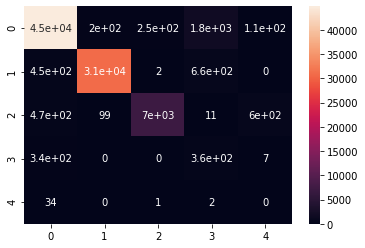

In [160]:
from sklearn.metrics import classification_report , confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
sns.heatmap(cm, annot=True)

In [161]:
 print("False Alarm Rate = %g" % (cm[0][1]/(cm[0][0] + cm[0][1])*100))

False Alarm Rate = 0.433054


In [162]:
unique1, counts1 = np.unique(y_test, return_counts=True)
counts1

array([47146, 32067,  8225,   707,    37], dtype=int64)

In [163]:
import math 
Normal =math.floor((46863/47146)*100)
Normal

99

In [164]:
Dos =math.floor((32067/33628)*100)
Dos

95

In [165]:
Prob=math.floor((7305/8225)*100)
Prob

88

In [166]:
R2L = math.floor((385/707)*100)
R2L

54

In [167]:
U2R = math.floor((37/53)*100)
U2R

69

In [168]:
x = train20.drop(['attack_type'],axis = 1)
y = train20.attack_type
x = x.values.astype(np.float)
y = y.values.astype(np.float)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.70, random_state=42)

ValueError: could not convert string to float: 'SF'

In [169]:
X_train

array([[   0.,   28.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,   43.,   72., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,  309., 4281., ...,    0.,    0.,    0.],
       [   0.,   43.,   70., ...,    0.,    0.,    0.]])

In [170]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train, y_train)


C:\Users\arif\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [171]:
y_predict = svc.predict(X_test)
for i in y_predict:
    if i == 0:
        print("Normal")
    elif i == 1:
        print("Dos")
    elif i == 2:
        print("Prob")
    elif i == 3:
        print("R2L")
    else:
        print("U2R")
        
        
        

Normal
Dos
Dos
Dos
Prob
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Prob
Normal
Dos
R2L
Normal
Prob
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Prob
Normal
Normal
Dos
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Prob
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Prob
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Prob
Normal
Normal
Dos
Normal
Norma

Dos
Prob
Normal
R2L
Normal
Normal
R2L
Dos
Normal
Dos
Dos
Prob
Dos
Normal
Dos
Dos
Normal
Dos
Prob
Prob
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Prob
Dos
Normal
Dos
Dos
Normal
Dos
U2R
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Prob
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Prob
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
R2L
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Prob
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Prob
Dos
Normal
Nor

Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Prob
Prob
Dos
Normal
Dos
Dos
Prob
Dos
R2L
Dos
U2R
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
R2L
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Prob
Dos
Normal
Dos
Normal
Dos
Prob
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
N

Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Dos
U2R
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Prob
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Prob
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
U2R
Normal
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Prob
Prob
Normal
Dos
Normal
Prob
Normal
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Prob
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Prob
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Norma

Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Prob
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Prob
Normal
Normal
Dos
Prob
Normal
Normal
Prob
Dos
Prob
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
R2L
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Dos
Normal
Nor

Normal
Normal
Dos
Normal
Dos
Prob
Prob
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Dos
Prob
Dos
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Prob
Normal
Normal
R2L
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Prob
Dos
Dos
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Prob
Normal
Prob
Normal
Dos
Dos
Normal
Prob
Prob
Dos
Dos
Dos
Dos
Dos
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Dos
No

Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Prob
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Prob
Dos
Prob
Dos
Dos
U2R
Dos
Normal
Dos
Prob
Dos
Dos
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Prob
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Do

Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Dos
Dos
Dos
Dos
Normal
Normal
R2L
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Prob
Prob
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Prob
Dos
Normal
Dos
Dos
Normal
Prob
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Dos
Prob
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Prob
Dos
Normal
Dos
Normal
Normal
Prob


Normal
Dos
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Prob
Prob
Normal
Prob
Normal
Normal
Dos
Dos
Dos
Dos
Dos
R2L
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Prob
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
R2L
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Prob
Dos
Dos
Normal
Prob
Prob
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Prob
Normal
Dos
Dos
Dos
Dos
Prob
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Dos
Normal
R2L
Normal
Dos
Normal
Dos
Dos
Normal
Prob
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Prob
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Prob
Normal
Prob
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos

Dos
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Prob
Prob
Normal
Normal
Dos
Dos
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Prob
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
R2L
Dos
Prob
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Dos
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Dos
Prob
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Prob
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Prob
Dos
Dos
Normal
Prob
Normal
Normal
Dos
Dos
Normal
Normal
R2L
Normal
Dos
Normal
Prob
Prob
Normal
Normal
Dos
Normal
Dos
Prob
Dos
Dos
Normal
Normal
Dos
Prob
Dos
Prob
Normal
Normal
Dos
Dos
Prob
Normal
Dos
Normal
Prob
Dos
N

Normal
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Prob
Normal
Normal
Prob
Prob
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
R2L
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Prob
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
U2R
Normal
Normal
Normal
Prob
Normal
Normal
Dos
Prob
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Prob
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Nor

Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Prob
Dos
Dos
Normal
Dos
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Prob
Normal
Prob
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Prob
Prob
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal

Prob
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
R2L
Normal
Dos
Dos
Dos
Normal
Prob
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Prob
Normal
Normal
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Prob
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Normal
Normal
D

Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Prob
Prob
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Prob
Dos
Dos
Dos
Dos
Normal
Normal
Prob
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Prob
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Prob
Normal
Normal
Normal
Prob
Prob
Prob
Normal
Dos
Normal
Dos
Dos
Normal
U2R
Prob
Normal
Normal
Prob
Normal
R2L
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Prob
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Prob
N

Normal
Dos
R2L
Dos
Normal
Prob
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Prob
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Prob
Normal
Prob
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Prob
Dos
R2L
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Prob
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Prob
Dos
Prob
Normal
Normal
Dos
Dos
Prob
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Prob
Dos
Normal
Prob
Dos
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
U2R
Dos
Dos
Normal
Normal
Prob
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Prob
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Prob
Dos
Dos
Normal
Dos
Dos
Normal
Prob
Prob
Dos
Dos
Do

Dos
Dos
Dos
Prob
Normal
Prob
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Prob
Prob
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Prob
Normal
Prob
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
R2L
Normal
Dos
Normal
Normal
Prob
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Prob
Dos
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Prob
Normal
U2R
Normal
Dos
Normal

Dos
Dos
Normal
Prob
Normal
Dos
Normal
Normal
Dos
Dos
Prob
Normal
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Dos
R2L
Dos
Dos
Prob
Dos
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Prob
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Prob
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Prob
Dos
Normal
R2L
Dos
Dos
R2L
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Prob
Dos
Normal
U2R
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
U2R
Normal
Prob
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal

Normal
Dos
Dos
Dos
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Dos
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Prob
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Prob
Normal
Dos
Prob
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Prob
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Prob
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Prob
Dos
Normal
Prob
Dos
Normal
Prob
Dos
Dos
Prob
Dos
Normal
Dos
Dos
Prob
Normal
Dos
Dos
Dos
Prob
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Prob
Normal
Dos
Dos
Dos
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Prob
Dos
Dos
Dos
Dos
Normal
Prob
Normal
Prob
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Prob
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Normal
Prob
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Prob
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos


Prob
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Prob
R2L
Normal
Dos
Dos
Dos
Prob
Prob
Normal
Normal
Prob
Dos
Dos
Prob
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Normal
Prob
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Prob
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Prob
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Dos
Dos
Dos

Normal
Prob
Normal
Normal
R2L
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Prob
Normal
Normal
Dos
Dos
Prob
Dos
Normal
Prob
Dos
Dos
Normal
U2R
Normal
R2L
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Dos
Normal
Prob
Normal
Dos
Prob
Prob
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Prob
Dos
Normal
Dos
Normal
Prob
Dos
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Dos
Normal

Prob
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Dos
Dos
Dos
Prob
Dos
Normal
Prob
Dos
Dos
R2L
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Prob
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Dos
Normal
Prob
Normal
Dos
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Dos
Prob
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Prob
Dos
Normal
Prob
Dos
Dos
Normal
Dos
Prob
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Prob
Normal
R2L
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
P

Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Prob
Prob
Normal
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Dos
Prob
Dos
Dos
Normal
Dos
Dos
Dos
Normal
R2L
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Prob
R2L
Normal
Prob
Dos
Prob
Prob
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Prob
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
U2R
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Prob
Prob
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Normal

Normal
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Prob
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Prob
Normal
Prob
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Prob
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Prob
Dos
R2L
Normal
Prob
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Prob
Dos
Dos
Prob
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Dos
U2R
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Nor

Normal
Prob
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Prob
Dos
Normal
Dos
Normal
Dos
Normal
Prob
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Dos
Prob
Prob
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Prob
Normal
Dos
Dos
Dos
Prob
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Prob
Dos
Normal
Dos
Prob
Normal
Dos
Dos
Dos
Normal
Dos
Prob
Prob
Dos
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
U2R
Prob
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
No

Normal
Prob
Dos
Normal
Normal
Normal
Normal
Dos
R2L
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
R2L
Normal
Normal
Normal
Normal
U2R
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Prob
Normal
Normal
Dos
Normal
Prob
Dos
Dos
Prob
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Prob
Normal
Dos
Prob
Dos
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Prob
Normal
Normal
Normal
Dos
Prob
Dos
Prob
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Prob
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Prob
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Prob
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Prob
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Normal
U2R
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
R2L
Dos
Prob
Normal
Dos
Dos
N

Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Prob
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Prob
Prob
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Prob
Normal
Dos
Dos
Normal
Prob
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Dos
Dos
Dos
Dos
Dos
Prob
Normal
Normal
Normal
Prob
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Prob
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Prob
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Prob
Dos
Dos
Normal
Dos
Prob
Dos
Prob
Dos
Normal
Dos
Prob
Normal
Dos
Dos
Dos
Dos
Prob
Normal
Normal
Dos
Dos
N

Dos
Normal
Prob
Dos
Normal
Prob
Normal
Prob
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Dos
Prob
Normal
Dos
R2L
Dos
Prob
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Prob
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Prob
Prob
Normal
Prob
Dos
Dos
Prob
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Prob
Prob
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Dos
U2R
Normal
Normal
R2L
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Prob
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
U2R
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Nor

Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Prob
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Prob
Normal
Dos
Prob
Dos
Normal
Normal
Dos
Dos
Prob
Prob
Normal
Normal
Normal
Dos
Dos
Normal
Prob
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Prob
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Dos
Prob
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Prob
Dos
Prob
Dos
Normal
Prob
Dos
Normal
Prob
Dos
Prob
Prob
Dos
Dos
Prob
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Prob
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal


Dos
U2R
Normal
Dos
Dos
Dos
Normal
Prob
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Prob
Dos
Prob
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Prob
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Prob
Prob
Dos
Normal
Dos
Normal
Prob
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
No

Normal
Normal
Normal
Normal
Prob
Normal
Normal
Prob
Dos
Normal
Dos
Prob
Dos
Normal
Normal
Normal
U2R
Normal
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Prob
Normal
Dos
Dos
Normal
Prob
Dos
Prob
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Prob
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Prob
Dos
Normal
Dos
U2R
Dos
Normal
Prob
Normal
Dos
Dos
Normal
Dos
Dos
Prob
Normal
Dos
Normal
Prob
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Prob
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Prob
Dos
Normal
Prob
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
U2R
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Dos

Normal
Dos
Normal
Dos
Normal
Dos
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Prob
U2R
Dos
Normal
Prob
Dos
Prob
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Prob
Normal
Prob
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Prob
Prob
Normal
Prob
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Prob
Normal
Normal
Normal
R2L
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Prob
Normal
Normal
Dos
Normal
R2L
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Prob
Dos
N

Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Dos
Prob
Prob
Prob
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Prob
R2L
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Prob
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Prob
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Prob
Dos
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Prob
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Prob
Dos
Dos
Prob
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Prob
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Dos
D

Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Prob
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Prob
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Prob
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
U2R
Dos
U2R
Dos
Dos
Dos
Normal
Prob
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Prob
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Prob
Dos
Prob
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Prob
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Pro

Dos
Dos
Dos
Dos
Normal
Dos
Prob
U2R
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Prob
Dos
Prob
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Dos
U2R
Dos
Dos
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Prob
Prob
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Normal
R2L
Normal
Normal
Normal
Dos
Prob
Dos
Dos
Dos
Dos
Prob
Dos
Prob
Normal
Normal
Dos
Dos
Prob
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Prob
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Nor

Dos
Dos
Dos
Dos
Dos
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Prob
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Dos
Normal
Prob
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Dos
Normal
Dos
Prob
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Prob
Prob
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
R2L
Normal
Normal
Prob
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Dos
U2R
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Prob
Dos
Normal
Dos
Dos
Norm

Normal
Normal
Normal
Dos
Normal
Dos
Prob
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Prob
Dos
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Prob
Prob
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Prob
Dos
Prob
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Prob
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Prob
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Dos
Dos
Normal
Dos
Prob
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Dos
Prob
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Prob
Normal
Prob
Normal
Normal
Prob
Dos
Normal
Dos
Dos
Normal
U2R
Dos
Normal
Dos
Normal
Dos
Normal
Norm

Dos
Dos
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Prob
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Dos
Normal
Prob
Normal
Prob
Prob
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Prob
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Prob
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Prob
Prob
Dos
Prob
Prob
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
R2L
Prob
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Prob
Normal
Normal
Dos
Prob
Dos
Dos
Dos
Normal
Dos
Normal


Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
U2R
Normal
Dos
Normal
Dos
Dos
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Prob
Normal
R2L
Dos
Normal
Prob
Normal
Normal
Normal
Prob
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Prob
Prob
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Dos
R2L
Normal
Normal
Normal
Dos
Dos
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Prob
Dos
Dos
Prob
Normal
Dos
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
R2L
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Prob
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Normal
Dos


Normal
Prob
Prob
Dos
Prob
Dos
Dos
Prob
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Prob
Normal
Dos
Prob
Dos
Dos
Dos
Dos
Prob
Dos
Prob
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Prob
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Prob
Dos
Normal
Prob
Normal
Prob
Normal
Dos
Dos
Dos
Dos
Normal
Normal
R2L
Prob
Prob
Dos
Dos
Dos
Dos
Dos
Prob
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Normal
Dos
Prob
Dos
Dos
Normal
Dos
Normal
Dos
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Dos
Dos
Prob
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Prob
Normal
R2L
Normal
Normal
Prob
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Dos
Dos
Dos
Dos
No

Normal
Dos
Dos
Normal
Dos
Prob
Dos
Dos
Dos
Dos
Prob
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Prob
Normal
Dos
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Prob
Normal
Dos
Prob
Normal
Normal
Normal
Prob
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Prob
Normal
Dos
Normal
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Prob
Dos
Prob
Prob
Prob
Normal
Dos
Normal
Dos

Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Dos
Prob
R2L
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Prob
Dos
Dos
Normal
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Prob
Normal
Prob
Prob
Normal
Normal
Normal
Normal
Normal
Prob
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Prob
Normal
Normal
Dos
Dos
Normal
Normal
Prob
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal


Prob
Prob
Dos
Normal
Normal
Normal
Normal
Prob
Dos
Dos
U2R
Prob
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Prob
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Prob
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Prob
Dos
Prob
Normal
Normal
Normal
Normal
Prob
Prob
Normal
Prob
Normal
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Prob
Normal
Normal
Dos
Normal
Dos
Normal
Normal
R2L
Dos
Normal
Prob
Dos
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Prob
Normal
Normal
Normal
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Dos


Dos
Dos
Dos
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Dos
R2L
Prob
Dos
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Prob
Normal
Normal
Dos
R2L
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Dos
Prob
Normal
Dos
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Prob
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Prob
Dos
Prob
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
U2R
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Prob
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Prob
Prob
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Normal
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Prob
Normal
R2L
Normal
Normal
Normal
Normal
Normal
Dos
Dos
No

Dos
Dos
Dos
Normal
Normal
Dos
U2R
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Normal
U2R
Normal
Normal
Dos
Prob
Normal
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Prob
Dos
Dos
Normal
Normal
Normal
Dos
Dos
Dos
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Prob
Dos
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Dos
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Normal
Normal
Prob
Prob
Dos
Prob
Dos
Normal
Dos
Dos
Normal
Dos
Normal
Prob
Dos
Prob
Dos
Dos
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Normal
Normal
Normal
Normal
Dos
Dos
Normal
Normal
Dos
Normal
Dos
Normal
Prob
Dos
Normal
Dos
Dos
Normal
Normal
Normal
Prob
Normal
Normal
Prob
Normal
Dos
Normal
Normal
Dos
Normal
Dos
Dos
Prob
Normal
Normal
Normal
Normal
Normal
Dos
Normal
Dos
Normal
Dos
Normal
Normal
Dos
Dos
Prob
Dos
Prob
Dos
Normal
Normal
Dos
Prob
Dos
Normal
Normal
Dos
Dos
D

In [172]:
svc.score(X_test,y_test)*100

94.31970243360323

In [173]:
unique, counts = np.unique(y_predict, return_counts=True)
counts

array([44092, 35128,  7962,   488,   512], dtype=int64)

[[43470  2891   578   161    46]
 [   42 32015    10     0     0]
 [  230   151  7373    10   461]
 [  316    71     0   315     5]
 [   34     0     1     2     0]]
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95     47146
         1.0       0.91      1.00      0.95     32067
         2.0       0.93      0.90      0.91      8225
         3.0       0.65      0.45      0.53       707
         4.0       0.00      0.00      0.00        37

    accuracy                           0.94     88182
   macro avg       0.69      0.65      0.67     88182
weighted avg       0.95      0.94      0.95     88182



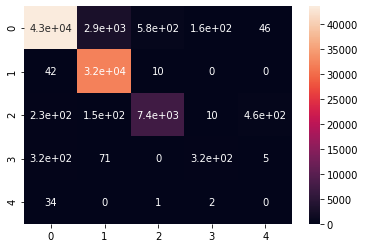

In [174]:
from sklearn.metrics import classification_report , confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
sns.heatmap(cm, annot=True)

In [175]:
 print("False Alarm Rate = %g" % (cm[0][1]/(cm[0][0] + cm[0][1])*100))

False Alarm Rate = 62.3584


In [176]:
unique1, counts1 = np.unique(y_test, return_counts=True)
counts1

array([47146, 32067,  8225,   707,    37], dtype=int64)

In [177]:
import math 
Normal =math.floor((47146/49574)*100)
Normal

95

In [178]:
Dos =math.floor((30281/32067)*100)
Dos

94

In [179]:
Prob=math.floor((7569/8225)*100)
Prob

92

In [180]:
R2L = math.floor((274/707)*100)
R2L

38

In [181]:
U2R = math.floor((437/861)*100)
U2R

50